# Data Loading and Preprocessing

In [ ]:
#! pip install kaggle
#! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d csafrit2/plant-leaves-for-image-classification

100% 6.56G/6.56G [04:05<00:00, 28.3MB/s]
100% 6.56G/6.56G [04:05<00:00, 28.7MB/s]


In [ ]:
!unzip /content/plant-leaves-for-image-classification.zip

Archive:  /content/plant-leaves-for-image-classification.zip
  inflating: Plants_2/images to predict/0001_0170.JPG  
  inflating: Plants_2/images to predict/0003_0179.JPG  
  inflating: Plants_2/images to predict/0005_0268.JPG  
  inflating: Plants_2/images to predict/0008_0148.JPG  
  inflating: Plants_2/images to predict/0015_0123.JPG  
  inflating: Plants_2/images to predict/0016_0118.JPG  
  inflating: Plants_2/images to predict/0019_0276.JPG  
  inflating: Plants_2/images to predict/0020_0271.JPG  
  inflating: Plants_2/test/Alstonia Scholaris diseased (P2a)/0014_0006.JPG  
  inflating: Plants_2/test/Alstonia Scholaris diseased (P2a)/0014_0007.JPG  
  inflating: Plants_2/test/Alstonia Scholaris diseased (P2a)/0014_0008.JPG  
  inflating: Plants_2/test/Alstonia Scholaris diseased (P2a)/0014_0009.JPG  
  inflating: Plants_2/test/Alstonia Scholaris diseased (P2a)/0014_0010.JPG  
  inflating: Plants_2/test/Alstonia Scholaris healthy (P2b)/0003_0006.JPG  
  inflating: Plants_2/test/Als

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
import torch
import torch
import torchvision
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings("ignore")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
import numpy as np
import torch
from torchvision import transforms
from torchvision.datasets.folder import ImageFolder
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import time
from tqdm import tqdm
from timeit import default_timer as timer
import tensorflow as tf
import torch
import warnings
import torch
import torchvision
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
from tqdm import tqdm
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
warnings.filterwarnings("ignore")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
import pathlib
data_dir = '/content/Plants_2/train//'
data_dir = pathlib.Path(data_dir)
path = data_dir
path

PosixPath('/content/Plants_2/train')

In [ ]:
folder_list = ['Alstonia Scholaris diseased (P2a)','Alstonia Scholaris healthy (P2b)','Arjun diseased (P1a)',
              'Arjun healthy (P1b)','Bael diseased (P4b)','Basil healthy (P8)','Chinar diseased (P11b)','Chinar healthy (P11a)',
              'Gauva diseased (P3b)','Gauva healthy (P3a)','Jamun diseased (P5b)','Jamun healthy (P5a)','Jatropha diseased (P6b)',
              'Jatropha healthy (P6a)','Lemon diseased (P10b)','Lemon healthy (P10a)','Mango diseased (P0b)','Mango healthy (P0a)',
              'Pomegranate diseased (P9b)','Pomegranate healthy (P9a)','Pongamia Pinnata diseased (P7b)','Pongamia Pinnata healthy (P7a)']

In [ ]:
x = []
y = []
#data_dir.glob('Alstonia Scholaris diseased (P2a)/*')
i = 1
for folder in folder_list:
    string = folder + '/*'
    images = list(data_dir.glob(string))
    for img in images:
        pic = cv2.resize(cv2.imread(str(img)),(64,64))
        x.append(pic) 
        y.append(folder)
    print(f'Folder {i} complete.\n')
    i = i+1

Folder 1 complete.

Folder 2 complete.

Folder 3 complete.

Folder 4 complete.

Folder 5 complete.

Folder 6 complete.

Folder 7 complete.

Folder 8 complete.

Folder 9 complete.

Folder 10 complete.

Folder 11 complete.

Folder 12 complete.

Folder 13 complete.

Folder 14 complete.

Folder 15 complete.

Folder 16 complete.

Folder 17 complete.

Folder 18 complete.

Folder 19 complete.

Folder 20 complete.

Folder 21 complete.

Folder 22 complete.



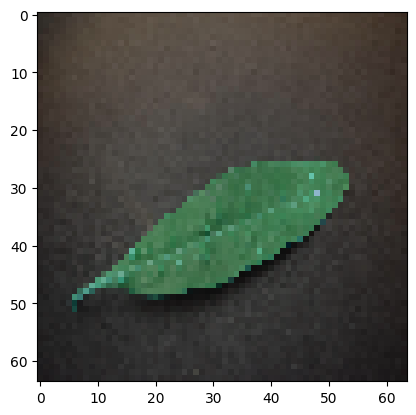

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
x = np.array(x,dtype='float32')
x = x/255
plt.imshow(x[0])

In [ ]:
height = 64
width = 64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.30)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test,test_size=0.66)
print(x_train.shape,x_val.shape,x_test.shape)

(2991, 64, 64, 3) (436, 64, 64, 3) (847, 64, 64, 3)


In [ ]:
pd.DataFrame(le.inverse_transform(y_train)).value_counts()

Jamun diseased (P5b)                 236
Pongamia Pinnata healthy (P7a)       204
Pongamia Pinnata diseased (P7b)      190
Gauva healthy (P3a)                  189
Jamun healthy (P5a)                  185
Mango diseased (P0b)                 183
Pomegranate healthy (P9a)            182
Pomegranate diseased (P9b)           182
Alstonia Scholaris diseased (P2a)    170
Arjun diseased (P1a)                 158
Arjun healthy (P1b)                  141
Alstonia Scholaris healthy (P2b)     117
Mango healthy (P0a)                  110
Lemon healthy (P10a)                 106
Gauva diseased (P3b)                 102
Basil healthy (P8)                    97
Jatropha healthy (P6a)                95
Chinar diseased (P11b)                80
Jatropha diseased (P6b)               72
Bael diseased (P4b)                   70
Chinar healthy (P11a)                 69
Lemon diseased (P10b)                 53
dtype: int64

# Oversampling (Smote)

In [ ]:
from imblearn.over_sampling import SMOTE
x_train = x_train.reshape(2991, 64*64*3)
smote = SMOTE(sampling_strategy = 'all')
x_smote, y_smote = smote.fit_resample(x_train , y_train)
x_smote.shape
#X_smote = x_smote.reshape(10800, 28, 28, 3)

(5192, 12288)

In [ ]:
x_smote = x_smote.reshape(5192, 64, 64, 3)

In [ ]:
pd.DataFrame(le.inverse_transform(y_smote)).value_counts()

Alstonia Scholaris diseased (P2a)    236
Alstonia Scholaris healthy (P2b)     236
Pongamia Pinnata diseased (P7b)      236
Pomegranate healthy (P9a)            236
Pomegranate diseased (P9b)           236
Mango healthy (P0a)                  236
Mango diseased (P0b)                 236
Lemon healthy (P10a)                 236
Lemon diseased (P10b)                236
Jatropha healthy (P6a)               236
Jatropha diseased (P6b)              236
Jamun healthy (P5a)                  236
Jamun diseased (P5b)                 236
Gauva healthy (P3a)                  236
Gauva diseased (P3b)                 236
Chinar healthy (P11a)                236
Chinar diseased (P11b)               236
Basil healthy (P8)                   236
Bael diseased (P4b)                  236
Arjun healthy (P1b)                  236
Arjun diseased (P1a)                 236
Pongamia Pinnata healthy (P7a)       236
dtype: int64

In [ ]:
a = torch.tensor(x_smote)
b = torch.tensor(y_smote)
c = torch.tensor(x_test)
d = torch.tensor(y_test)
e = torch.tensor(x_val)
f = torch.tensor(y_val)
d = d.type(torch.LongTensor)
b = b.type(torch.LongTensor)
f = f.type(torch.LongTensor)
a =a.reshape(5192,3,height,width)
c = c.reshape(847,3,height,width)
e = e.reshape(436,3,height,width)
print(a.shape)
print(c.shape)
print(e.shape)
from torch.utils.data import TensorDataset,DataLoader
tensor_data1 = TensorDataset(a,b)
tensor_data2 = TensorDataset(c,d)
tensor_data3 = TensorDataset(e,f)
teacher_loader = DataLoader(tensor_data1,shuffle=1,batch_size=128)
test_loader = DataLoader(tensor_data2,shuffle=1,batch_size=128)
val_loader = DataLoader(tensor_data3,shuffle=1,batch_size=128)

torch.Size([5192, 3, 64, 64])
torch.Size([847, 3, 64, 64])
torch.Size([436, 3, 64, 64])


In [ ]:
torch.save(teacher_loader,'tensor_data1.pt')
torch.save(test_loader,'tesnsor_data2.pt')
torch.save(val_loader,'tesnsor_data3.pt')

# Teacher Traning

In [ ]:
tmodel = torchvision.models.densenet121()
tmodel.classifier = nn.Linear(in_features=1024, out_features=22, bias=True)
for name, child in tmodel.named_children():
   if name in ['features','avgpool','classifier']:
       print(name + ' is unfrozen')
       for param in child.parameters():
           param.requires_grad = True
   else:
       print(name + ' is frozen')
       for param in child.parameters():
           param.requires_grad = False
optimizer2 = torch.optim.Adadelta(filter(lambda p: p.requires_grad, tmodel.parameters()), lr=0.05)
#optimizer2 = torch.optim.SGD(model.parameters(), lr=0.5)
import time
from timeit import default_timer as timer
tmodel = tmodel.cuda()

features is unfrozen
classifier is unfrozen


In [ ]:
train_loss = []
val_los = []
train_acc = []
val_acc = []
for i in range(10):
        l1 = []
        l2 = []
        a1 = []
        a2 = []
        start = timer()
        for img,labels in tqdm(teacher_loader, desc='Training', unit=' unit',leave=False,colour='red'):
            



           # print(end - start)
            
            
            
            img = img.to(device)
            labels = labels.to(device)
            output = tmodel(img)
            probs = F.softmax(output,dim=1)
            max_prob,preds = torch.max(probs,dim=1)
            acc1 = (torch.sum(preds == labels).item() / len(preds))
            
            
            #accu=[]
            a1.append(acc1)
            #gg = np.mean(accu)
            
            loss = nn.CrossEntropyLoss()(output,labels)
            l1.append(loss.item())
            loss.backward()
            optimizer2.step()
            optimizer2.zero_grad()
            
        for a,b in tqdm(val_loader, desc='Training', unit=' unit',leave=False,colour='red'):
                a = a.to(device)
                b = b.to(device)
                rr = tmodel(a)
                val_loss = nn.CrossEntropyLoss()(rr,b)
                l2.append(val_loss.item())
                probs = F.softmax(rr,dim=1)
                max_prob,preds = torch.max(probs,dim=1)
                acc = (torch.sum(preds == b).item() / len(preds))
                a2.append(acc)
        train_loss.append(np.mean(l1))
        val_los.append(np.mean(l2))
        train_acc.append(np.mean(a1))
        val_acc.append(np.mean(a2))
        end = timer()
        time = end - start
        time = time/60
        print(f'Epoch {i+1}/10: Train Loss==> {np.mean(l1):.2f} Val Loss==> {np.mean(l2):.2f} Train_Acc==> {np.mean(a1):.2f} Val_Acc==> {np.mean(a2):.2f}')   
        #print(i+1,loss,acc)

Epoch 1/10: Train Loss==> 2.54 Val Loss==> 2.15 Train_Acc==> 0.34 Val_Acc==> 0.44


Epoch 2/10: Train Loss==> 1.80 Val Loss==> 1.65 Train_Acc==> 0.57 Val_Acc==> 0.54


Epoch 3/10: Train Loss==> 1.29 Val Loss==> 1.36 Train_Acc==> 0.68 Val_Acc==> 0.60


Epoch 4/10: Train Loss==> 0.98 Val Loss==> 1.19 Train_Acc==> 0.75 Val_Acc==> 0.63


Epoch 5/10: Train Loss==> 0.74 Val Loss==> 1.02 Train_Acc==> 0.82 Val_Acc==> 0.68


Epoch 6/10: Train Loss==> 0.55 Val Loss==> 0.89 Train_Acc==> 0.87 Val_Acc==> 0.73


Epoch 7/10: Train Loss==> 0.43 Val Loss==> 0.84 Train_Acc==> 0.90 Val_Acc==> 0.75


Epoch 8/10: Train Loss==> 0.33 Val Loss==> 0.68 Train_Acc==> 0.93 Val_Acc==> 0.78


Epoch 9/10: Train Loss==> 0.26 Val Loss==> 0.71 Train_Acc==> 0.95 Val_Acc==> 0.79


Epoch 10/10: Train Loss==> 0.21 Val Loss==> 0.75 Train_Acc==> 0.96 Val_Acc==> 0.76


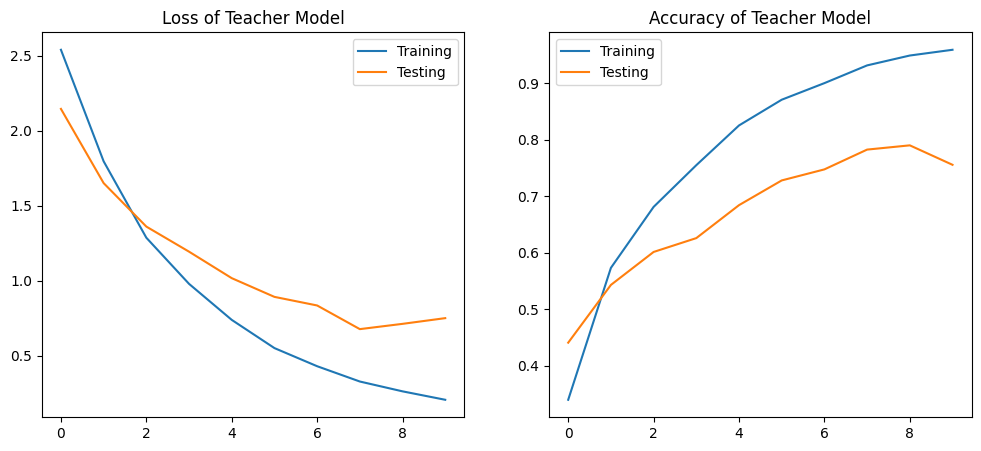

In [ ]:
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(1, 2, 1)
  
# showing image
plt.plot(train_loss,label='Training')
plt.plot(val_los,label='Testing')
plt.legend()
plt.title("Loss of Teacher Model")
fig.add_subplot(1, 2, 2)
  
# showing image
plt.plot(train_acc,label='Training')
plt.plot(val_acc,label='Testing')
plt.legend()
plt.title("Accuracy of Teacher Model")
plt.show()


In [ ]:
import joblib
joblib.dump(tmodel, 'tmodel1.pkl')

['tmodel1.pkl']

In [ ]:
start = timer()
predictions = []
accu = []
l_act = []
i = 0
for images_test,labels_test in test_loader:
    #i = i+1```````````````````````````````
    images_test = images_test.to(device)
    labels_test = labels_test.to(device)
    ypred = tmodel(images_test)
    probs = F.softmax(ypred,dim=1)
    max_prob,preds = torch.max(probs,dim=1)
    #print(preds)
    #print(max_prob)
    acc = (torch.sum(preds == labels_test).item() / len(preds))
    accu.append(acc)
    predictions.append(preds)
    l_act.append(labels_test)
    
print(f'Accuracy of Teacher(Densenet121) is : {np.mean(accu):.2f}')
predictions = [t.cpu().numpy() for t in predictions]
predictions = np.array(np.concatenate(predictions))
pd.DataFrame(predictions).value_counts()
ytrue = [t.cpu().numpy() for t in l_act]
ytrue = np.array(np.concatenate(ytrue))
pd.DataFrame(ytrue).value_counts()
report = pd.DataFrame()
report['Actual'] = ytrue
report['Predicted'] = predictions
report['Actual1'] = le.inverse_transform(report['Actual'])
report['Predicted1'] = le.inverse_transform(report['Predicted'])
report5 = report.copy()
from sklearn.metrics import classification_report
print(classification_report(report['Actual1'], report['Predicted1']))

Accuracy of Teacher(Densenet121) is : 0.77
                                   precision    recall  f1-score   support

Alstonia Scholaris diseased (P2a)       0.68      0.83      0.75        47
 Alstonia Scholaris healthy (P2b)       0.59      0.53      0.56        32
             Arjun diseased (P1a)       0.83      0.87      0.85        45
              Arjun healthy (P1b)       0.90      0.84      0.87        43
              Bael diseased (P4b)       0.92      1.00      0.96        22
               Basil healthy (P8)       0.77      0.90      0.83        30
           Chinar diseased (P11b)       0.65      0.71      0.68        21
            Chinar healthy (P11a)       0.52      0.72      0.60        18
             Gauva diseased (P3b)       0.50      0.59      0.54        17
              Gauva healthy (P3a)       0.83      0.68      0.75        50
             Jamun diseased (P5b)       0.85      0.73      0.78        62
              Jamun healthy (P5a)       0.76      0.81  

In [ ]:
tmodel2 = torchvision.models.resnet101()
tmodel2.fc = nn.Linear(in_features=2048, out_features=22, bias=True)
for name, child in tmodel2.named_children():
   if name in ['conv1','layer1','layer2','layer3','layer4','fc']:
       print(name + ' is unfrozen')
       for param in child.parameters():
           param.requires_grad = True
   else:
       print(name + ' is frozen')
       for param in child.parameters():
           param.requires_grad = False
optimizer2 = torch.optim.Adadelta(filter(lambda p: p.requires_grad, tmodel2.parameters()), lr=0.4,weight_decay=0.0004)
#optimizer2 = torch.optim.SGD(model.parameters(), lr=0.5)
import time
from timeit import default_timer as timer
tmodel2 = tmodel2.cuda()

conv1 is unfrozen
bn1 is frozen
relu is frozen
maxpool is frozen
layer1 is unfrozen
layer2 is unfrozen
layer3 is unfrozen
layer4 is unfrozen
avgpool is frozen
fc is unfrozen


In [ ]:
train_loss = []
val_los = []
train_acc = []
val_acc = []
for i in range(10):
        l1 = []
        l2 = []
        a1 = []
        a2 = []
        start = timer()
        for img,labels in tqdm(teacher_loader, desc='Training', unit=' unit',leave=False,colour='red'):
            



           # print(end - start)
            
            
            
            img = img.to(device)
            labels = labels.to(device)
            output = tmodel2(img)
            probs = F.softmax(output,dim=1)
            max_prob,preds = torch.max(probs,dim=1)
            acc1 = (torch.sum(preds == labels).item() / len(preds))
            
            
            #accu=[]
            a1.append(acc1)
            #gg = np.mean(accu)
            
            loss = nn.CrossEntropyLoss()(output,labels)
            l1.append(loss.item())
            loss.backward()
            optimizer2.step()
            optimizer2.zero_grad()
            
        for a,b in tqdm(val_loader, desc='Training', unit=' unit',leave=False,colour='red'):
                a = a.to(device)
                b = b.to(device)
                rr = tmodel2(a)
                val_loss = nn.CrossEntropyLoss()(rr,b)
                l2.append(val_loss.item())
                probs = F.softmax(rr,dim=1)
                max_prob,preds = torch.max(probs,dim=1)
                acc = (torch.sum(preds == b).item() / len(preds))
                a2.append(acc)
        train_loss.append(np.mean(l1))
        val_los.append(np.mean(l2))
        train_acc.append(np.mean(a1))
        val_acc.append(np.mean(a2))
        end = timer()
        time = end - start
        time = time/60
        print(f'Epoch {i+1}/15: Train Loss==> {np.mean(l1):.2f} Val Loss==> {np.mean(l2):.2f} Train_Acc==> {np.mean(a1):.2f} Val_Acc==> {np.mean(a2):.2f}')   
        #print(i+1,loss,acc)

Epoch 1/15: Train Loss==> 3.06 Val Loss==> 2.94 Train_Acc==> 0.16 Val_Acc==> 0.24


Epoch 2/15: Train Loss==> 2.15 Val Loss==> 2.17 Train_Acc==> 0.34 Val_Acc==> 0.36


Epoch 3/15: Train Loss==> 1.60 Val Loss==> 1.80 Train_Acc==> 0.50 Val_Acc==> 0.43


Epoch 4/15: Train Loss==> 1.28 Val Loss==> 1.60 Train_Acc==> 0.62 Val_Acc==> 0.55


Epoch 5/15: Train Loss==> 0.97 Val Loss==> 1.59 Train_Acc==> 0.73 Val_Acc==> 0.52


Epoch 6/15: Train Loss==> 0.79 Val Loss==> 1.28 Train_Acc==> 0.77 Val_Acc==> 0.65


Epoch 7/15: Train Loss==> 0.56 Val Loss==> 1.17 Train_Acc==> 0.83 Val_Acc==> 0.67


Epoch 8/15: Train Loss==> 0.44 Val Loss==> 1.12 Train_Acc==> 0.86 Val_Acc==> 0.72


Epoch 9/15: Train Loss==> 0.34 Val Loss==> 1.08 Train_Acc==> 0.89 Val_Acc==> 0.70


Epoch 10/15: Train Loss==> 0.26 Val Loss==> 0.93 Train_Acc==> 0.91 Val_Acc==> 0.74


In [ ]:
import joblib
joblib.dump(tmodel2, 'tmodel2.pkl')

['tmodel2.pkl']

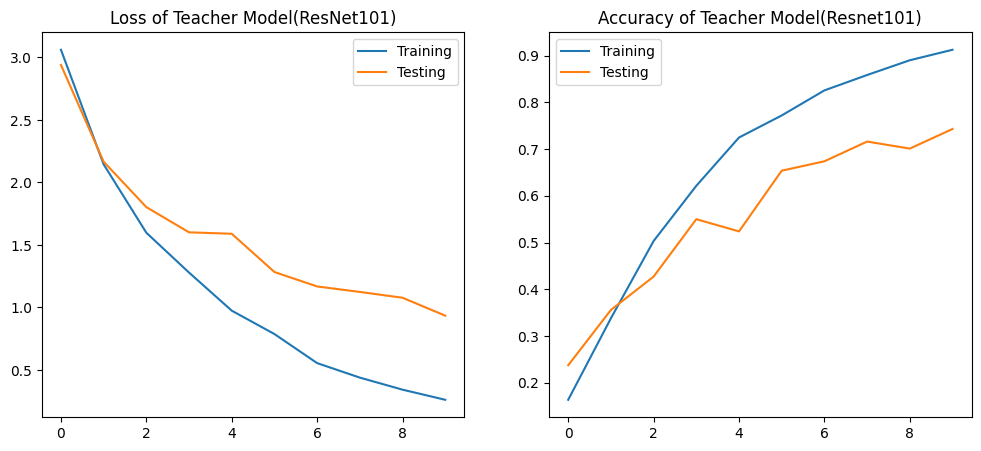

In [ ]:
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(1, 2, 1)
  
# showing image
plt.plot(train_loss,label='Training')
plt.plot(val_los,label='Testing')
plt.legend()
plt.title("Loss of Teacher Model(ResNet101)")
fig.add_subplot(1, 2, 2)
  
# showing image
plt.plot(train_acc,label='Training')
plt.plot(val_acc,label='Testing')
plt.legend()
plt.title("Accuracy of Teacher Model(Resnet101)")
plt.show()


In [ ]:
start = timer()
predictions = []
accu = []
l_act = []
i = 0
for images_test,labels_test in test_loader:
    #i = i+1```````````````````````````````
    images_test = images_test.to(device)
    labels_test = labels_test.to(device)
    ypred = tmodel2(images_test)
    probs = F.softmax(ypred,dim=1)
    max_prob,preds = torch.max(probs,dim=1)
    #print(preds)
    #print(max_prob)
    acc = (torch.sum(preds == labels_test).item() / len(preds))
    accu.append(acc)
    predictions.append(preds)
    l_act.append(labels_test)
    
print(f'Accuracy of Teacher(ResNet101) is : {np.mean(accu):.2f}')
predictions = [t.cpu().numpy() for t in predictions]
predictions = np.array(np.concatenate(predictions))
pd.DataFrame(predictions).value_counts()
ytrue = [t.cpu().numpy() for t in l_act]
ytrue = np.array(np.concatenate(ytrue))
pd.DataFrame(ytrue).value_counts()
report = pd.DataFrame()
report['Actual'] = ytrue
report['Predicted'] = predictions
report['Actual1'] = le.inverse_transform(report['Actual'])
report['Predicted1'] = le.inverse_transform(report['Predicted'])
report5 = report.copy()
from sklearn.metrics import classification_report
print(classification_report(report['Actual1'], report['Predicted1']))

Accuracy of Teacher(ResNet101) is : 0.73
                                   precision    recall  f1-score   support

Alstonia Scholaris diseased (P2a)       0.93      0.81      0.86        47
 Alstonia Scholaris healthy (P2b)       0.48      0.78      0.60        32
             Arjun diseased (P1a)       0.61      0.96      0.74        45
              Arjun healthy (P1b)       0.95      0.42      0.58        43
              Bael diseased (P4b)       0.83      0.91      0.87        22
               Basil healthy (P8)       0.72      0.77      0.74        30
           Chinar diseased (P11b)       0.45      0.43      0.44        21
            Chinar healthy (P11a)       0.54      0.72      0.62        18
             Gauva diseased (P3b)       0.50      0.59      0.54        17
              Gauva healthy (P3a)       0.83      0.78      0.80        50
             Jamun diseased (P5b)       0.88      0.56      0.69        62
              Jamun healthy (P5a)       0.60      0.47    

# Student

In [ ]:
sdata1,sdata2 = random_split(tensor_data1,[5000,192])
sdata1,sdata2 = random_split(sdata1,[2500,2500])

In [ ]:
sloader1 = DataLoader((sdata1),shuffle=1,batch_size=64)
sloader2 = DataLoader((sdata2),shuffle=1,batch_size=64)

In [ ]:
import torch
import torch.nn as nn

class smodel(nn.Module):
    def __init__(self):
        super(smodel, self).__init__()
        
        # Define convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=5, stride=2)
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=8, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(in_channels=8, out_channels=8, kernel_size=3, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv4 = nn.Conv2d(in_channels=8, out_channels=8, kernel_size=3, padding=1)
        self.relu4 = nn.ReLU()
        # Define fully connected layers
        self.fc1 = nn.Linear(in_features=392 , out_features=22)
        #self.relu3 = nn.ReLU()
        #self.fc2 = nn.Linear(in_features=250, out_features=22)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.pool3(x)
        x = self.conv4(x)
        x = self.relu4(x)
        #print(x.shape)
        x = torch.flatten(x,1)
        #print(x.shape)
        x = self.fc1(x)
        #x = self.relu3(x)
        #x = self.fc2(x)
        #print(x.shape)
        return x


In [ ]:
smodel3 = smodel()
smodel3 = smodel3.cuda()
smodel4 = smodel()
smodel4 = smodel4.cuda()
optimizers = torch.optim.SGD(smodel4.parameters(), lr=0.03,momentum=0.9)
optimizers2 = torch.optim.Adadelta(smodel3.parameters(), lr=0.3)

In [ ]:
train_loss = []
val_los = []
train_acc = []
val_acc = []
for i in range(100):
        l1 = []
        l2 = []
        a1 = []
        a2 = []
        start = timer()
        for img,labels in tqdm(sloader2, desc='Training', unit=' unit',leave=False,colour='red'):
            



           # print(end - start)
            
            
            
            img = img.to(device)
            labels = labels.to(device)
            
            output = smodel3(img)
            #print(output.shape)
            probs = F.softmax(output,dim=1)
            max_prob,preds = torch.max(probs,dim=1)
            #print(len(labels))
            acc1 = (torch.sum(preds == labels).item() / len(preds))
            #compare = smodel3(img)
            #pdist = F.softmax(compare/4,dim=1)  ##Teacher distribution
            #max_prob1,preds1 = torch.max(pdist,dim=1)   #Teacher output
            #accu=[]
            a1.append(acc1)
            #gg = np.mean(accu)
            #soft_loss_teacher = nn.KLDivLoss(reduction='batchmean')(F.log_softmax(output / 4, dim=1), pdist)
            loss = nn.CrossEntropyLoss()(output,labels)
            #loss = 0.2*loss + 0.8*soft_loss_teacher
            l1.append(loss.item())
            loss.backward()
            optimizers2.step()
            optimizers2.zero_grad()
            
        for a,b in tqdm(val_loader, desc='Training', unit=' unit',leave=False,colour='red'):
                a = a.to(device)
                b = b.to(device)
                rr = smodel3(a)
                val_loss = nn.CrossEntropyLoss()(rr,b)
                l2.append(val_loss.item())
                probs = F.softmax(rr,dim=1)
                max_prob,preds = torch.max(probs,dim=1)
                acc = (torch.sum(preds == b).item() / len(preds))
                a2.append(acc)
        train_loss.append(np.mean(l1))
        val_los.append(np.mean(l2))
        train_acc.append(np.mean(a1))
        val_acc.append(np.mean(a2))
        end = timer()
        time = end - start
        time = time/60
        print(f'Epoch {i+1}/100: Train Loss==> {np.mean(l1):.2f} Val Loss==> {np.mean(l2):.2f} Train_Acc==> {np.mean(a1):.2f} Val_Acc==> {np.mean(a2):.2f}')   
        #print(i+1,loss,acc)

Epoch 1/100: Train Loss==> 3.09 Val Loss==> 3.09 Train_Acc==> 0.05 Val_Acc==> 0.05


Epoch 2/100: Train Loss==> 3.09 Val Loss==> 3.08 Train_Acc==> 0.05 Val_Acc==> 0.06


Epoch 3/100: Train Loss==> 3.06 Val Loss==> 3.08 Train_Acc==> 0.06 Val_Acc==> 0.06


Epoch 4/100: Train Loss==> 2.97 Val Loss==> 2.75 Train_Acc==> 0.08 Val_Acc==> 0.10


Epoch 5/100: Train Loss==> 2.80 Val Loss==> 2.68 Train_Acc==> 0.10 Val_Acc==> 0.08


Epoch 6/100: Train Loss==> 2.69 Val Loss==> 2.54 Train_Acc==> 0.13 Val_Acc==> 0.14


Epoch 7/100: Train Loss==> 2.56 Val Loss==> 4.30 Train_Acc==> 0.15 Val_Acc==> 0.04


Epoch 8/100: Train Loss==> 2.46 Val Loss==> 2.57 Train_Acc==> 0.20 Val_Acc==> 0.13


Epoch 9/100: Train Loss==> 2.31 Val Loss==> 2.61 Train_Acc==> 0.25 Val_Acc==> 0.13


Epoch 10/100: Train Loss==> 2.24 Val Loss==> 2.38 Train_Acc==> 0.25 Val_Acc==> 0.14


Epoch 11/100: Train Loss==> 2.15 Val Loss==> 2.37 Train_Acc==> 0.27 Val_Acc==> 0.20


Epoch 12/100: Train Loss==> 2.07 Val Loss==> 2.10 Train_Acc==> 0.32 Val_Acc==> 0.30


Epoch 13/100: Train Loss==> 2.06 Val Loss==> 2.20 Train_Acc==> 0.31 Val_Acc==> 0.30


Epoch 14/100: Train Loss==> 2.01 Val Loss==> 2.06 Train_Acc==> 0.33 Val_Acc==> 0.31


Epoch 15/100: Train Loss==> 1.97 Val Loss==> 2.08 Train_Acc==> 0.33 Val_Acc==> 0.23


Epoch 16/100: Train Loss==> 1.97 Val Loss==> 2.35 Train_Acc==> 0.34 Val_Acc==> 0.23


Epoch 17/100: Train Loss==> 1.92 Val Loss==> 2.14 Train_Acc==> 0.36 Val_Acc==> 0.29


Epoch 18/100: Train Loss==> 1.89 Val Loss==> 2.32 Train_Acc==> 0.37 Val_Acc==> 0.21


Epoch 19/100: Train Loss==> 1.87 Val Loss==> 2.19 Train_Acc==> 0.37 Val_Acc==> 0.27


Epoch 20/100: Train Loss==> 1.84 Val Loss==> 2.27 Train_Acc==> 0.39 Val_Acc==> 0.27


Epoch 21/100: Train Loss==> 1.83 Val Loss==> 1.99 Train_Acc==> 0.38 Val_Acc==> 0.34


Epoch 22/100: Train Loss==> 1.82 Val Loss==> 2.01 Train_Acc==> 0.39 Val_Acc==> 0.33


Epoch 23/100: Train Loss==> 1.81 Val Loss==> 1.94 Train_Acc==> 0.40 Val_Acc==> 0.38


Epoch 24/100: Train Loss==> 1.75 Val Loss==> 1.90 Train_Acc==> 0.43 Val_Acc==> 0.36


Epoch 25/100: Train Loss==> 1.74 Val Loss==> 2.26 Train_Acc==> 0.43 Val_Acc==> 0.29


Epoch 26/100: Train Loss==> 1.74 Val Loss==> 1.90 Train_Acc==> 0.42 Val_Acc==> 0.41


Epoch 27/100: Train Loss==> 1.71 Val Loss==> 1.91 Train_Acc==> 0.44 Val_Acc==> 0.35


Epoch 28/100: Train Loss==> 1.68 Val Loss==> 2.04 Train_Acc==> 0.44 Val_Acc==> 0.33


Epoch 29/100: Train Loss==> 1.68 Val Loss==> 1.99 Train_Acc==> 0.44 Val_Acc==> 0.36


Epoch 30/100: Train Loss==> 1.70 Val Loss==> 2.25 Train_Acc==> 0.43 Val_Acc==> 0.25


Epoch 31/100: Train Loss==> 1.69 Val Loss==> 2.06 Train_Acc==> 0.45 Val_Acc==> 0.32


Epoch 32/100: Train Loss==> 1.63 Val Loss==> 2.04 Train_Acc==> 0.46 Val_Acc==> 0.30


Epoch 33/100: Train Loss==> 1.65 Val Loss==> 2.01 Train_Acc==> 0.47 Val_Acc==> 0.33


Epoch 34/100: Train Loss==> 1.58 Val Loss==> 1.98 Train_Acc==> 0.48 Val_Acc==> 0.34


Epoch 35/100: Train Loss==> 1.57 Val Loss==> 1.78 Train_Acc==> 0.48 Val_Acc==> 0.41


Epoch 36/100: Train Loss==> 1.59 Val Loss==> 2.23 Train_Acc==> 0.48 Val_Acc==> 0.30


Epoch 37/100: Train Loss==> 1.56 Val Loss==> 1.87 Train_Acc==> 0.50 Val_Acc==> 0.35


Epoch 38/100: Train Loss==> 1.53 Val Loss==> 1.77 Train_Acc==> 0.49 Val_Acc==> 0.46


Epoch 39/100: Train Loss==> 1.50 Val Loss==> 1.84 Train_Acc==> 0.51 Val_Acc==> 0.43


Epoch 40/100: Train Loss==> 1.51 Val Loss==> 1.93 Train_Acc==> 0.50 Val_Acc==> 0.37


Epoch 41/100: Train Loss==> 1.44 Val Loss==> 1.85 Train_Acc==> 0.53 Val_Acc==> 0.40


Epoch 42/100: Train Loss==> 1.46 Val Loss==> 1.99 Train_Acc==> 0.52 Val_Acc==> 0.36


Epoch 43/100: Train Loss==> 1.46 Val Loss==> 2.14 Train_Acc==> 0.51 Val_Acc==> 0.36


Epoch 44/100: Train Loss==> 1.45 Val Loss==> 2.16 Train_Acc==> 0.53 Val_Acc==> 0.33


Epoch 45/100: Train Loss==> 1.38 Val Loss==> 1.77 Train_Acc==> 0.54 Val_Acc==> 0.45


Epoch 46/100: Train Loss==> 1.37 Val Loss==> 2.09 Train_Acc==> 0.55 Val_Acc==> 0.32


Epoch 47/100: Train Loss==> 1.39 Val Loss==> 1.72 Train_Acc==> 0.55 Val_Acc==> 0.43


Epoch 48/100: Train Loss==> 1.35 Val Loss==> 1.71 Train_Acc==> 0.56 Val_Acc==> 0.43


Epoch 49/100: Train Loss==> 1.35 Val Loss==> 1.71 Train_Acc==> 0.56 Val_Acc==> 0.43


Epoch 50/100: Train Loss==> 1.34 Val Loss==> 1.92 Train_Acc==> 0.56 Val_Acc==> 0.43


Epoch 51/100: Train Loss==> 1.35 Val Loss==> 1.86 Train_Acc==> 0.57 Val_Acc==> 0.43


Epoch 52/100: Train Loss==> 1.30 Val Loss==> 1.97 Train_Acc==> 0.58 Val_Acc==> 0.43


Epoch 53/100: Train Loss==> 1.29 Val Loss==> 2.06 Train_Acc==> 0.57 Val_Acc==> 0.38


Epoch 54/100: Train Loss==> 1.28 Val Loss==> 1.73 Train_Acc==> 0.57 Val_Acc==> 0.46


Epoch 55/100: Train Loss==> 1.28 Val Loss==> 2.33 Train_Acc==> 0.58 Val_Acc==> 0.33


Epoch 56/100: Train Loss==> 1.26 Val Loss==> 1.99 Train_Acc==> 0.60 Val_Acc==> 0.37


Epoch 57/100: Train Loss==> 1.25 Val Loss==> 1.79 Train_Acc==> 0.60 Val_Acc==> 0.45


Epoch 58/100: Train Loss==> 1.20 Val Loss==> 1.49 Train_Acc==> 0.61 Val_Acc==> 0.54


Epoch 59/100: Train Loss==> 1.26 Val Loss==> 2.66 Train_Acc==> 0.59 Val_Acc==> 0.32


Epoch 60/100: Train Loss==> 1.23 Val Loss==> 1.63 Train_Acc==> 0.60 Val_Acc==> 0.50


Epoch 61/100: Train Loss==> 1.19 Val Loss==> 1.70 Train_Acc==> 0.61 Val_Acc==> 0.47


Epoch 62/100: Train Loss==> 1.18 Val Loss==> 1.70 Train_Acc==> 0.62 Val_Acc==> 0.48


Epoch 63/100: Train Loss==> 1.18 Val Loss==> 1.65 Train_Acc==> 0.61 Val_Acc==> 0.47


Epoch 64/100: Train Loss==> 1.18 Val Loss==> 1.63 Train_Acc==> 0.61 Val_Acc==> 0.44


Epoch 65/100: Train Loss==> 1.21 Val Loss==> 2.10 Train_Acc==> 0.59 Val_Acc==> 0.39


Epoch 66/100: Train Loss==> 1.15 Val Loss==> 1.43 Train_Acc==> 0.63 Val_Acc==> 0.52


Epoch 67/100: Train Loss==> 1.15 Val Loss==> 1.70 Train_Acc==> 0.62 Val_Acc==> 0.47


Epoch 68/100: Train Loss==> 1.14 Val Loss==> 1.47 Train_Acc==> 0.62 Val_Acc==> 0.52


Epoch 69/100: Train Loss==> 1.12 Val Loss==> 1.39 Train_Acc==> 0.62 Val_Acc==> 0.55


Epoch 70/100: Train Loss==> 1.12 Val Loss==> 1.95 Train_Acc==> 0.63 Val_Acc==> 0.41


Epoch 71/100: Train Loss==> 1.11 Val Loss==> 1.89 Train_Acc==> 0.64 Val_Acc==> 0.39


Epoch 72/100: Train Loss==> 1.11 Val Loss==> 1.35 Train_Acc==> 0.64 Val_Acc==> 0.53


Epoch 73/100: Train Loss==> 1.11 Val Loss==> 1.67 Train_Acc==> 0.64 Val_Acc==> 0.46


Epoch 74/100: Train Loss==> 1.09 Val Loss==> 1.37 Train_Acc==> 0.65 Val_Acc==> 0.56


Epoch 75/100: Train Loss==> 1.10 Val Loss==> 1.67 Train_Acc==> 0.64 Val_Acc==> 0.51


Epoch 76/100: Train Loss==> 1.09 Val Loss==> 2.11 Train_Acc==> 0.64 Val_Acc==> 0.39


Epoch 77/100: Train Loss==> 1.09 Val Loss==> 1.60 Train_Acc==> 0.65 Val_Acc==> 0.49


Epoch 78/100: Train Loss==> 1.09 Val Loss==> 1.59 Train_Acc==> 0.65 Val_Acc==> 0.54


Epoch 79/100: Train Loss==> 1.04 Val Loss==> 1.67 Train_Acc==> 0.66 Val_Acc==> 0.50


Epoch 80/100: Train Loss==> 1.03 Val Loss==> 1.80 Train_Acc==> 0.65 Val_Acc==> 0.46


Epoch 81/100: Train Loss==> 1.06 Val Loss==> 1.50 Train_Acc==> 0.65 Val_Acc==> 0.56


Epoch 82/100: Train Loss==> 1.04 Val Loss==> 1.97 Train_Acc==> 0.66 Val_Acc==> 0.46


Epoch 83/100: Train Loss==> 1.04 Val Loss==> 1.50 Train_Acc==> 0.66 Val_Acc==> 0.51


Epoch 84/100: Train Loss==> 1.01 Val Loss==> 1.96 Train_Acc==> 0.66 Val_Acc==> 0.48


Epoch 85/100: Train Loss==> 1.00 Val Loss==> 1.80 Train_Acc==> 0.67 Val_Acc==> 0.47


Epoch 86/100: Train Loss==> 0.99 Val Loss==> 1.61 Train_Acc==> 0.68 Val_Acc==> 0.51


Epoch 87/100: Train Loss==> 1.02 Val Loss==> 1.77 Train_Acc==> 0.66 Val_Acc==> 0.46


Epoch 88/100: Train Loss==> 0.98 Val Loss==> 1.50 Train_Acc==> 0.67 Val_Acc==> 0.57


Epoch 89/100: Train Loss==> 1.01 Val Loss==> 1.91 Train_Acc==> 0.68 Val_Acc==> 0.46


Epoch 90/100: Train Loss==> 0.94 Val Loss==> 1.37 Train_Acc==> 0.70 Val_Acc==> 0.56


Epoch 91/100: Train Loss==> 0.97 Val Loss==> 1.53 Train_Acc==> 0.68 Val_Acc==> 0.54


Epoch 92/100: Train Loss==> 0.95 Val Loss==> 1.99 Train_Acc==> 0.69 Val_Acc==> 0.41


Epoch 93/100: Train Loss==> 0.96 Val Loss==> 1.36 Train_Acc==> 0.70 Val_Acc==> 0.57


Epoch 94/100: Train Loss==> 0.95 Val Loss==> 1.49 Train_Acc==> 0.69 Val_Acc==> 0.54


Epoch 95/100: Train Loss==> 0.96 Val Loss==> 1.35 Train_Acc==> 0.70 Val_Acc==> 0.57


Epoch 96/100: Train Loss==> 0.96 Val Loss==> 1.26 Train_Acc==> 0.69 Val_Acc==> 0.60


Epoch 97/100: Train Loss==> 0.95 Val Loss==> 1.84 Train_Acc==> 0.69 Val_Acc==> 0.47


Epoch 98/100: Train Loss==> 0.90 Val Loss==> 1.50 Train_Acc==> 0.71 Val_Acc==> 0.54


Epoch 99/100: Train Loss==> 0.90 Val Loss==> 1.63 Train_Acc==> 0.70 Val_Acc==> 0.52


Epoch 100/100: Train Loss==> 0.94 Val Loss==> 1.58 Train_Acc==> 0.70 Val_Acc==> 0.52


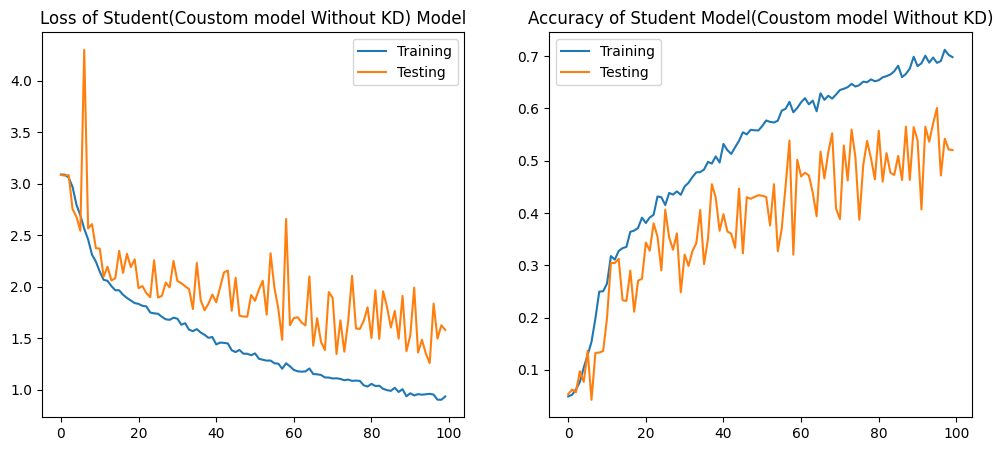

In [ ]:
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(1, 2, 1)
  
# showing image
plt.plot(train_loss,label='Training')
plt.plot(val_los,label='Testing')
plt.legend()
plt.title("Loss of Student(Coustom model Without KD) Model")
fig.add_subplot(1, 2, 2)
  
# showing image
plt.plot(train_acc,label='Training')
plt.plot(val_acc,label='Testing')
plt.legend()
plt.title("Accuracy of Student Model(Coustom model Without KD)")
plt.show()


In [ ]:
classification_report(smodel3,test_loader)

Accuracy of model is : 0.51
                                   precision    recall  f1-score   support

Alstonia Scholaris diseased (P2a)       0.52      0.60      0.55        47
 Alstonia Scholaris healthy (P2b)       0.64      0.50      0.56        32
             Arjun diseased (P1a)       0.41      0.64      0.50        45
              Arjun healthy (P1b)       0.39      0.74      0.51        43
              Bael diseased (P4b)       1.00      0.68      0.81        22
               Basil healthy (P8)       0.38      0.47      0.42        30
           Chinar diseased (P11b)       0.89      0.38      0.53        21
            Chinar healthy (P11a)       0.16      0.33      0.21        18
             Gauva diseased (P3b)       0.29      0.35      0.32        17
              Gauva healthy (P3a)       0.67      0.20      0.31        50
             Jamun diseased (P5b)       0.66      0.61      0.63        62
              Jamun healthy (P5a)       0.74      0.42      0.54       

In [ ]:
train_loss1 = []
val_los1 = []
train_acc1 = []
val_acc1 = []
for i in range(100):
        l1 = []
        l2 = []
        a1 = []
        a2 = []
        start = timer()
        for img,labels in tqdm(sloader2, desc='Training', unit=' unit',leave=False,colour='red'):
            



           # print(end - start)
            
            
            
            img = img.to(device)
            labels = labels.to(device)
            
            output = smodel4(img)
            #print(output.shape)
            probs = F.softmax(output,dim=1)
            max_prob,preds = torch.max(probs,dim=1)
            #print(len(labels))
            acc1 = (torch.sum(preds == labels).item() / len(preds))
            compare = tmodel(img)
            pdist = F.softmax(compare/4,dim=1)  ##Teacher distribution
            max_prob1,preds1 = torch.max(pdist,dim=1)   #Teacher output
            #accu=[]
            a1.append(acc1)
            #gg = np.mean(accu)
            soft_loss_teacher = nn.KLDivLoss(reduction='batchmean')(F.log_softmax(output /4, dim=1), pdist)
            loss = nn.CrossEntropyLoss()(output,labels)
            loss = 0.4*1*loss + 0.6*1*soft_loss_teacher
            l1.append(loss.item())
            loss.backward()
            optimizers.step()
            optimizers.zero_grad()
            
        for a,b in tqdm(val_loader, desc='Training', unit=' unit',leave=False,colour='red'):
                a = a.to(device)
                b = b.to(device)
                rr = smodel4(a)
                val_loss = nn.CrossEntropyLoss()(rr,b)
                l2.append(val_loss.item())
                probs = F.softmax(rr,dim=1)
                max_prob,preds = torch.max(probs,dim=1)
                acc = (torch.sum(preds == b).item() / len(preds))
                a2.append(acc)
        train_loss1.append(np.mean(l1))
        val_los1.append(np.mean(l2))
        train_acc1.append(np.mean(a1))
        val_acc1.append(np.mean(a2))
        end = timer()
        time = end - start
        time = time/60
        print(f'Epoch {i+1}/100: Train Loss==> {np.mean(l1):.2f} Val Loss==> {np.mean(l2):.2f} Train_Acc==> {np.mean(a1):.2f} Val_Acc==> {np.mean(a2):.2f}')   
        #print(i+1,loss,acc)

Epoch 1/100: Train Loss==> 1.38 Val Loss==> 3.08 Train_Acc==> 0.04 Val_Acc==> 0.01


Epoch 2/100: Train Loss==> 1.38 Val Loss==> 3.08 Train_Acc==> 0.05 Val_Acc==> 0.03


Epoch 3/100: Train Loss==> 1.38 Val Loss==> 3.08 Train_Acc==> 0.05 Val_Acc==> 0.06


Epoch 4/100: Train Loss==> 1.38 Val Loss==> 3.08 Train_Acc==> 0.05 Val_Acc==> 0.06


Epoch 5/100: Train Loss==> 1.38 Val Loss==> 3.06 Train_Acc==> 0.05 Val_Acc==> 0.13


Epoch 6/100: Train Loss==> 1.33 Val Loss==> 2.58 Train_Acc==> 0.08 Val_Acc==> 0.13


Epoch 7/100: Train Loss==> 1.22 Val Loss==> 2.53 Train_Acc==> 0.09 Val_Acc==> 0.13


Epoch 8/100: Train Loss==> 1.17 Val Loss==> 2.48 Train_Acc==> 0.11 Val_Acc==> 0.10


Epoch 9/100: Train Loss==> 1.15 Val Loss==> 2.46 Train_Acc==> 0.13 Val_Acc==> 0.17


Epoch 10/100: Train Loss==> 1.13 Val Loss==> 2.37 Train_Acc==> 0.15 Val_Acc==> 0.27


Epoch 11/100: Train Loss==> 1.10 Val Loss==> 2.43 Train_Acc==> 0.19 Val_Acc==> 0.21


Epoch 12/100: Train Loss==> 1.06 Val Loss==> 2.22 Train_Acc==> 0.22 Val_Acc==> 0.27


Epoch 13/100: Train Loss==> 1.03 Val Loss==> 2.33 Train_Acc==> 0.25 Val_Acc==> 0.32


Epoch 14/100: Train Loss==> 1.04 Val Loss==> 2.51 Train_Acc==> 0.26 Val_Acc==> 0.21


Epoch 15/100: Train Loss==> 1.00 Val Loss==> 2.73 Train_Acc==> 0.27 Val_Acc==> 0.16


Epoch 16/100: Train Loss==> 0.91 Val Loss==> 1.97 Train_Acc==> 0.33 Val_Acc==> 0.36


Epoch 17/100: Train Loss==> 0.84 Val Loss==> 1.87 Train_Acc==> 0.37 Val_Acc==> 0.35


Epoch 18/100: Train Loss==> 0.83 Val Loss==> 1.97 Train_Acc==> 0.42 Val_Acc==> 0.34


Epoch 19/100: Train Loss==> 0.94 Val Loss==> 1.89 Train_Acc==> 0.34 Val_Acc==> 0.39


Epoch 20/100: Train Loss==> 0.79 Val Loss==> 2.29 Train_Acc==> 0.41 Val_Acc==> 0.26


Epoch 21/100: Train Loss==> 0.83 Val Loss==> 1.63 Train_Acc==> 0.39 Val_Acc==> 0.45


Epoch 22/100: Train Loss==> 0.67 Val Loss==> 1.47 Train_Acc==> 0.52 Val_Acc==> 0.54


Epoch 23/100: Train Loss==> 0.62 Val Loss==> 1.96 Train_Acc==> 0.56 Val_Acc==> 0.36


Epoch 24/100: Train Loss==> 0.68 Val Loss==> 1.64 Train_Acc==> 0.52 Val_Acc==> 0.48


Epoch 25/100: Train Loss==> 0.70 Val Loss==> 1.50 Train_Acc==> 0.52 Val_Acc==> 0.53


Epoch 26/100: Train Loss==> 0.58 Val Loss==> 1.89 Train_Acc==> 0.61 Val_Acc==> 0.40


Epoch 27/100: Train Loss==> 0.59 Val Loss==> 1.40 Train_Acc==> 0.59 Val_Acc==> 0.56


Epoch 28/100: Train Loss==> 0.54 Val Loss==> 1.95 Train_Acc==> 0.62 Val_Acc==> 0.40


Epoch 29/100: Train Loss==> 0.54 Val Loss==> 1.42 Train_Acc==> 0.63 Val_Acc==> 0.56


Epoch 30/100: Train Loss==> 0.49 Val Loss==> 1.45 Train_Acc==> 0.67 Val_Acc==> 0.57


Epoch 31/100: Train Loss==> 0.52 Val Loss==> 2.48 Train_Acc==> 0.65 Val_Acc==> 0.32


Epoch 32/100: Train Loss==> 0.57 Val Loss==> 1.39 Train_Acc==> 0.63 Val_Acc==> 0.56


Epoch 33/100: Train Loss==> 0.44 Val Loss==> 1.52 Train_Acc==> 0.72 Val_Acc==> 0.57


Epoch 34/100: Train Loss==> 0.47 Val Loss==> 1.40 Train_Acc==> 0.69 Val_Acc==> 0.54


Epoch 35/100: Train Loss==> 0.43 Val Loss==> 1.30 Train_Acc==> 0.71 Val_Acc==> 0.60


Epoch 36/100: Train Loss==> 0.41 Val Loss==> 1.40 Train_Acc==> 0.75 Val_Acc==> 0.58


Epoch 37/100: Train Loss==> 0.39 Val Loss==> 1.26 Train_Acc==> 0.76 Val_Acc==> 0.61


Epoch 38/100: Train Loss==> 0.38 Val Loss==> 1.61 Train_Acc==> 0.76 Val_Acc==> 0.51


Epoch 39/100: Train Loss==> 0.40 Val Loss==> 1.25 Train_Acc==> 0.74 Val_Acc==> 0.57


Epoch 40/100: Train Loss==> 0.37 Val Loss==> 1.46 Train_Acc==> 0.77 Val_Acc==> 0.54


Epoch 41/100: Train Loss==> 0.38 Val Loss==> 1.16 Train_Acc==> 0.77 Val_Acc==> 0.66


Epoch 42/100: Train Loss==> 0.34 Val Loss==> 1.36 Train_Acc==> 0.79 Val_Acc==> 0.62


Epoch 43/100: Train Loss==> 0.32 Val Loss==> 1.17 Train_Acc==> 0.81 Val_Acc==> 0.64


Epoch 44/100: Train Loss==> 0.33 Val Loss==> 1.96 Train_Acc==> 0.81 Val_Acc==> 0.43


Epoch 45/100: Train Loss==> 0.36 Val Loss==> 1.22 Train_Acc==> 0.78 Val_Acc==> 0.63


Epoch 46/100: Train Loss==> 0.28 Val Loss==> 1.27 Train_Acc==> 0.86 Val_Acc==> 0.62


Epoch 47/100: Train Loss==> 0.27 Val Loss==> 1.29 Train_Acc==> 0.86 Val_Acc==> 0.61


Epoch 48/100: Train Loss==> 0.34 Val Loss==> 1.53 Train_Acc==> 0.80 Val_Acc==> 0.49


Epoch 49/100: Train Loss==> 0.34 Val Loss==> 1.23 Train_Acc==> 0.79 Val_Acc==> 0.63


Epoch 50/100: Train Loss==> 0.28 Val Loss==> 1.14 Train_Acc==> 0.83 Val_Acc==> 0.64


Epoch 51/100: Train Loss==> 0.25 Val Loss==> 1.21 Train_Acc==> 0.87 Val_Acc==> 0.64


Epoch 52/100: Train Loss==> 0.27 Val Loss==> 2.19 Train_Acc==> 0.85 Val_Acc==> 0.45


Epoch 53/100: Train Loss==> 0.30 Val Loss==> 1.20 Train_Acc==> 0.83 Val_Acc==> 0.63


Epoch 54/100: Train Loss==> 0.23 Val Loss==> 1.14 Train_Acc==> 0.89 Val_Acc==> 0.68


Epoch 55/100: Train Loss==> 0.22 Val Loss==> 1.88 Train_Acc==> 0.90 Val_Acc==> 0.44


Epoch 56/100: Train Loss==> 0.34 Val Loss==> 1.19 Train_Acc==> 0.81 Val_Acc==> 0.66


Epoch 57/100: Train Loss==> 0.22 Val Loss==> 1.18 Train_Acc==> 0.90 Val_Acc==> 0.65


Epoch 58/100: Train Loss==> 0.23 Val Loss==> 1.46 Train_Acc==> 0.88 Val_Acc==> 0.63


Epoch 59/100: Train Loss==> 0.20 Val Loss==> 1.30 Train_Acc==> 0.92 Val_Acc==> 0.61


Epoch 60/100: Train Loss==> 0.22 Val Loss==> 1.36 Train_Acc==> 0.89 Val_Acc==> 0.63


Epoch 61/100: Train Loss==> 0.21 Val Loss==> 1.48 Train_Acc==> 0.92 Val_Acc==> 0.60


Epoch 62/100: Train Loss==> 0.22 Val Loss==> 1.47 Train_Acc==> 0.89 Val_Acc==> 0.56


Epoch 63/100: Train Loss==> 0.23 Val Loss==> 1.42 Train_Acc==> 0.89 Val_Acc==> 0.57


Epoch 64/100: Train Loss==> 0.20 Val Loss==> 1.25 Train_Acc==> 0.92 Val_Acc==> 0.64


Epoch 65/100: Train Loss==> 0.19 Val Loss==> 1.22 Train_Acc==> 0.93 Val_Acc==> 0.65


Epoch 66/100: Train Loss==> 0.18 Val Loss==> 1.25 Train_Acc==> 0.92 Val_Acc==> 0.64


Epoch 67/100: Train Loss==> 0.21 Val Loss==> 1.21 Train_Acc==> 0.91 Val_Acc==> 0.66


Epoch 68/100: Train Loss==> 0.17 Val Loss==> 1.37 Train_Acc==> 0.94 Val_Acc==> 0.64


Epoch 69/100: Train Loss==> 0.16 Val Loss==> 1.22 Train_Acc==> 0.94 Val_Acc==> 0.63


Epoch 70/100: Train Loss==> 0.17 Val Loss==> 1.23 Train_Acc==> 0.95 Val_Acc==> 0.64


Epoch 71/100: Train Loss==> 0.15 Val Loss==> 1.18 Train_Acc==> 0.96 Val_Acc==> 0.65


Epoch 72/100: Train Loss==> 0.15 Val Loss==> 1.14 Train_Acc==> 0.97 Val_Acc==> 0.68


Epoch 73/100: Train Loss==> 0.16 Val Loss==> 1.20 Train_Acc==> 0.94 Val_Acc==> 0.65


Epoch 74/100: Train Loss==> 0.15 Val Loss==> 1.17 Train_Acc==> 0.96 Val_Acc==> 0.67


Epoch 75/100: Train Loss==> 0.14 Val Loss==> 1.14 Train_Acc==> 0.97 Val_Acc==> 0.67


Epoch 76/100: Train Loss==> 0.13 Val Loss==> 1.14 Train_Acc==> 0.98 Val_Acc==> 0.68


Epoch 77/100: Train Loss==> 0.13 Val Loss==> 1.21 Train_Acc==> 0.98 Val_Acc==> 0.65


Epoch 78/100: Train Loss==> 0.13 Val Loss==> 1.19 Train_Acc==> 0.98 Val_Acc==> 0.66


Epoch 79/100: Train Loss==> 0.13 Val Loss==> 1.28 Train_Acc==> 0.98 Val_Acc==> 0.64


Epoch 80/100: Train Loss==> 0.13 Val Loss==> 1.17 Train_Acc==> 0.98 Val_Acc==> 0.68


Epoch 81/100: Train Loss==> 0.12 Val Loss==> 1.18 Train_Acc==> 0.98 Val_Acc==> 0.64


Epoch 82/100: Train Loss==> 0.12 Val Loss==> 1.24 Train_Acc==> 0.99 Val_Acc==> 0.64


Epoch 83/100: Train Loss==> 0.14 Val Loss==> 1.24 Train_Acc==> 0.97 Val_Acc==> 0.65


Epoch 84/100: Train Loss==> 0.13 Val Loss==> 1.12 Train_Acc==> 0.98 Val_Acc==> 0.67


Epoch 85/100: Train Loss==> 0.11 Val Loss==> 1.17 Train_Acc==> 0.99 Val_Acc==> 0.70


Epoch 86/100: Train Loss==> 0.11 Val Loss==> 1.16 Train_Acc==> 0.99 Val_Acc==> 0.68


Epoch 87/100: Train Loss==> 0.11 Val Loss==> 1.13 Train_Acc==> 0.99 Val_Acc==> 0.67


Epoch 88/100: Train Loss==> 0.11 Val Loss==> 1.13 Train_Acc==> 0.99 Val_Acc==> 0.67


Epoch 89/100: Train Loss==> 0.12 Val Loss==> 1.14 Train_Acc==> 0.98 Val_Acc==> 0.69


Epoch 90/100: Train Loss==> 0.12 Val Loss==> 1.22 Train_Acc==> 0.98 Val_Acc==> 0.68


Epoch 91/100: Train Loss==> 0.11 Val Loss==> 1.13 Train_Acc==> 0.99 Val_Acc==> 0.67


Epoch 92/100: Train Loss==> 0.12 Val Loss==> 1.12 Train_Acc==> 0.99 Val_Acc==> 0.68


Epoch 93/100: Train Loss==> 0.12 Val Loss==> 1.14 Train_Acc==> 0.98 Val_Acc==> 0.67


Epoch 94/100: Train Loss==> 0.12 Val Loss==> 1.15 Train_Acc==> 0.98 Val_Acc==> 0.68


Epoch 95/100: Train Loss==> 0.10 Val Loss==> 1.14 Train_Acc==> 1.00 Val_Acc==> 0.69


Epoch 96/100: Train Loss==> 0.10 Val Loss==> 1.08 Train_Acc==> 1.00 Val_Acc==> 0.67


Epoch 97/100: Train Loss==> 0.10 Val Loss==> 1.17 Train_Acc==> 1.00 Val_Acc==> 0.69


Epoch 98/100: Train Loss==> 0.12 Val Loss==> 1.20 Train_Acc==> 0.98 Val_Acc==> 0.67


Epoch 99/100: Train Loss==> 0.10 Val Loss==> 1.16 Train_Acc==> 0.99 Val_Acc==> 0.68


Epoch 100/100: Train Loss==> 0.10 Val Loss==> 1.13 Train_Acc==> 0.99 Val_Acc==> 0.69


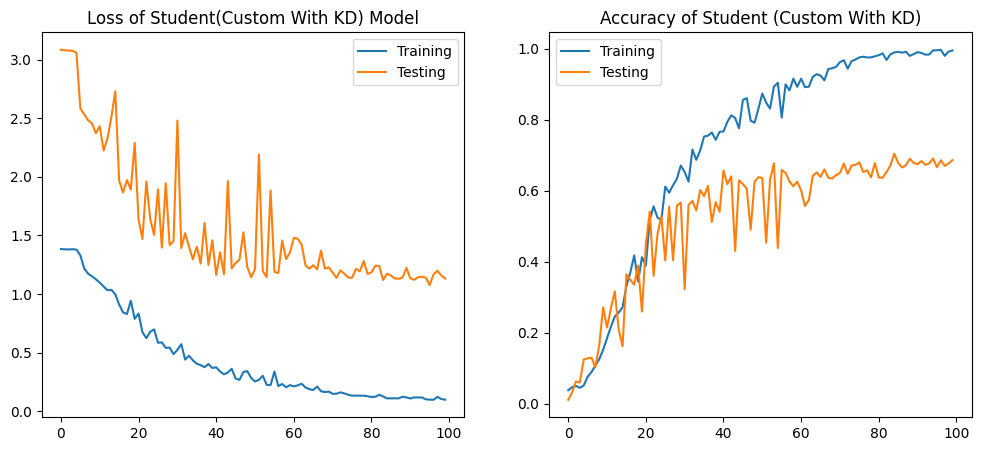

In [ ]:
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(1, 2, 1)
  
# showing image
plt.plot(train_loss1,label='Training')
plt.plot(val_los1,label='Testing')
plt.legend()
plt.title("Loss of Student(Custom With KD) Model")
fig.add_subplot(1, 2, 2)
  
# showing image
plt.plot(train_acc1,label='Training')
plt.plot(val_acc1,label='Testing')
plt.legend()
plt.title("Accuracy of Student (Custom With KD)")
plt.show()


In [ ]:
classification_report(smodel4,test_loader)

Accuracy of model is : 0.68
                                   precision    recall  f1-score   support

Alstonia Scholaris diseased (P2a)       0.59      0.70      0.64        47
 Alstonia Scholaris healthy (P2b)       0.59      0.50      0.54        32
             Arjun diseased (P1a)       0.91      0.64      0.75        45
              Arjun healthy (P1b)       0.78      0.81      0.80        43
              Bael diseased (P4b)       0.82      0.82      0.82        22
               Basil healthy (P8)       0.62      0.80      0.70        30
           Chinar diseased (P11b)       0.26      0.24      0.25        21
            Chinar healthy (P11a)       0.37      0.39      0.38        18
             Gauva diseased (P3b)       0.59      0.59      0.59        17
              Gauva healthy (P3a)       0.64      0.54      0.59        50
             Jamun diseased (P5b)       0.58      0.53      0.55        62
              Jamun healthy (P5a)       0.53      0.47      0.50       

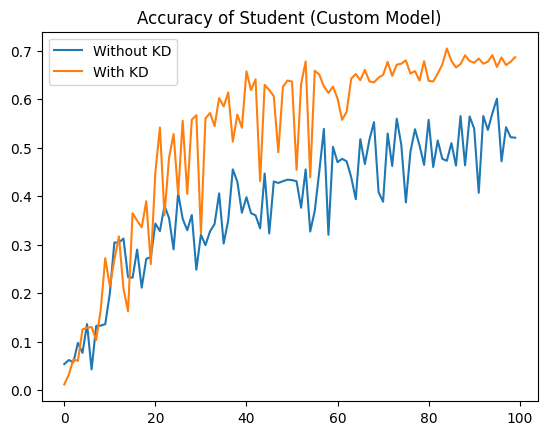

In [ ]:
plt.plot(val_acc,label='Without KD')
plt.plot(val_acc1,label='With KD')
plt.legend()
plt.title("Accuracy of Student (Custom Model)")
plt.show()


In [ ]:
import joblib
joblib.dump(smodel4, 'csmodel_dnet.pkl')

['csmodel_dnet.pkl']

In [ ]:
def classification_report(model,test_loader):
  predictions = []
  accu = []
  l_act = []
  i = 0
  for images_test,labels_test in test_loader:
      #i = i+1```````````````````````````````
      images_test = images_test.to(device)
      labels_test = labels_test.to(device)
      ypred = model(images_test)
      probs = F.softmax(ypred,dim=1)
      max_prob,preds = torch.max(probs,dim=1)
      #print(preds)
      #print(max_prob)
      acc = (torch.sum(preds == labels_test).item() / len(preds))
      accu.append(acc)
      predictions.append(preds)
      l_act.append(labels_test)
      
  print(f'Accuracy of model is : {np.mean(accu):.2f}')
  predictions = [t.cpu().numpy() for t in predictions]
  predictions = np.array(np.concatenate(predictions))
  pd.DataFrame(predictions).value_counts()
  ytrue = [t.cpu().numpy() for t in l_act]
  ytrue = np.array(np.concatenate(ytrue))
  pd.DataFrame(ytrue).value_counts()
  report = pd.DataFrame()
  report['Actual'] = ytrue
  report['Predicted'] = predictions
  report['Actual1'] = le.inverse_transform(report['Actual'])
  report['Predicted1'] = le.inverse_transform(report['Predicted'])
  report5 = report.copy()
  from sklearn.metrics import classification_report
  print(classification_report(report['Actual1'], report['Predicted1']))

# DenseNET Teacher

In [ ]:
smodel1 = torch.hub.load('pytorch/vision:v0.10.0', 'shufflenet_v2_x1_0', pretrained=1)
smodel1.fc = nn.Sequential(
    nn.Linear(in_features = 1024,out_features=22),
)

for name, child in smodel1.named_children():
   if name in ['stage3','stage4','conv5','fc']:
       print(name + ' is unfrozen')
       for param in child.parameters():
           param.requires_grad = True
   else:
       print(name + ' is frozen')
       for param in child.parameters():
           param.requires_grad = False

smodel2 = torch.hub.load('pytorch/vision:v0.10.0', 'shufflenet_v2_x1_0', pretrained=1)
smodel2.fc = nn.Sequential(
    nn.Linear(in_features = 1024,out_features=22),
)

for name, child in smodel2.named_children():
   if name in ['stage3','stage4','conv5','fc']:
       print(name + ' is unfrozen')
       for param in child.parameters():
           param.requires_grad = True
   else:
       print(name + ' is frozen')
       for param in child.parameters():
           param.requires_grad = False
optimizers = torch.optim.Adadelta(filter(lambda p: p.requires_grad, smodel1.parameters()), lr=0.02)
#smodel2 = smodel()
smodel1 = smodel1.cuda()
smodel2 = smodel2.cuda()
#optimizers = torch.optim.Adadelta(smodel1.parameters(), lr=0.6,weight_decay=1e-5)
optimizers2 = torch.optim.Adadelta(filter(lambda p: p.requires_grad, smodel2.parameters()), lr=0.02)

conv1 is frozen
maxpool is frozen
stage2 is frozen
stage3 is unfrozen
stage4 is unfrozen
conv5 is unfrozen
fc is unfrozen
conv1 is frozen
maxpool is frozen
stage2 is frozen
stage3 is unfrozen
stage4 is unfrozen
conv5 is unfrozen
fc is unfrozen


Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


In [ ]:
train_loss = []
val_los = []
train_acc = []
val_acc = []
for i in range(100):
        l1 = []
        l2 = []
        a1 = []
        a2 = []
        start = timer()
        for img,labels in tqdm(sloader1, desc='Training', unit=' unit',leave=False,colour='red'):
            



           # print(end - start)
            
            
            
            img = img.to(device)
            labels = labels.to(device)
            
            output = smodel2(img)
            #print(output.shape)
            probs = F.softmax(output,dim=1)
            max_prob,preds = torch.max(probs,dim=1)
            #print(len(labels))
            acc1 = (torch.sum(preds == labels).item() / len(preds))
            #compare = tmodel(img)
            #pdist = F.softmax(compare/4,dim=1)  ##Teacher distribution
            #max_prob1,preds1 = torch.max(pdist,dim=1)   #Teacher output
            #accu=[]
            a1.append(acc1)
            #gg = np.mean(accu)
            #soft_loss_teacher = nn.KLDivLoss(reduction='batchmean')(F.log_softmax(output / 4, dim=1), pdist)
            loss = nn.CrossEntropyLoss()(output,labels)
            #loss = 0.2*loss + 0.8*soft_loss_teacher
            l1.append(loss.item())
            loss.backward()
            optimizers2.step()
            optimizers2.zero_grad()
            
        for a,b in tqdm(val_loader, desc='Training', unit=' unit',leave=False,colour='red'):
                a = a.to(device)
                b = b.to(device)
                rr = smodel2(a)
                val_loss = nn.CrossEntropyLoss()(rr,b)
                l2.append(val_loss.item())
                probs = F.softmax(rr,dim=1)
                max_prob,preds = torch.max(probs,dim=1)
                acc = (torch.sum(preds == b).item() / len(preds))
                a2.append(acc)
        train_loss.append(np.mean(l1))
        val_los.append(np.mean(l2))
        train_acc.append(np.mean(a1))
        val_acc.append(np.mean(a2))
        end = timer()
        time = end - start
        time = time/60
        print(f'Epoch {i+1}/100: Train Loss==> {np.mean(l1):.2f} Val Loss==> {np.mean(l2):.2f} Train_Acc==> {np.mean(a1):.2f} Val_Acc==> {np.mean(a2):.2f}')   
        #print(i+1,loss,acc)

Epoch 1/100: Train Loss==> 3.09 Val Loss==> 3.09 Train_Acc==> 0.04 Val_Acc==> 0.05


Epoch 2/100: Train Loss==> 3.09 Val Loss==> 3.08 Train_Acc==> 0.06 Val_Acc==> 0.08


Epoch 3/100: Train Loss==> 3.08 Val Loss==> 3.08 Train_Acc==> 0.09 Val_Acc==> 0.09


Epoch 4/100: Train Loss==> 3.08 Val Loss==> 3.07 Train_Acc==> 0.10 Val_Acc==> 0.12


Epoch 5/100: Train Loss==> 3.08 Val Loss==> 3.07 Train_Acc==> 0.11 Val_Acc==> 0.13


Epoch 6/100: Train Loss==> 3.07 Val Loss==> 3.07 Train_Acc==> 0.13 Val_Acc==> 0.18


Epoch 7/100: Train Loss==> 3.07 Val Loss==> 3.06 Train_Acc==> 0.15 Val_Acc==> 0.16


Epoch 8/100: Train Loss==> 3.06 Val Loss==> 3.06 Train_Acc==> 0.19 Val_Acc==> 0.17


Epoch 9/100: Train Loss==> 3.06 Val Loss==> 3.05 Train_Acc==> 0.18 Val_Acc==> 0.19


Epoch 10/100: Train Loss==> 3.05 Val Loss==> 3.05 Train_Acc==> 0.20 Val_Acc==> 0.19


Epoch 11/100: Train Loss==> 3.04 Val Loss==> 3.04 Train_Acc==> 0.21 Val_Acc==> 0.18


Epoch 12/100: Train Loss==> 3.04 Val Loss==> 3.03 Train_Acc==> 0.23 Val_Acc==> 0.19


Epoch 13/100: Train Loss==> 3.03 Val Loss==> 3.02 Train_Acc==> 0.24 Val_Acc==> 0.22


Epoch 14/100: Train Loss==> 3.02 Val Loss==> 3.01 Train_Acc==> 0.24 Val_Acc==> 0.20


Epoch 15/100: Train Loss==> 3.01 Val Loss==> 3.00 Train_Acc==> 0.26 Val_Acc==> 0.25


Epoch 16/100: Train Loss==> 3.00 Val Loss==> 2.99 Train_Acc==> 0.26 Val_Acc==> 0.22


Epoch 17/100: Train Loss==> 2.99 Val Loss==> 2.98 Train_Acc==> 0.26 Val_Acc==> 0.22


Epoch 18/100: Train Loss==> 2.97 Val Loss==> 2.96 Train_Acc==> 0.27 Val_Acc==> 0.24


Epoch 19/100: Train Loss==> 2.96 Val Loss==> 2.95 Train_Acc==> 0.29 Val_Acc==> 0.24


Epoch 20/100: Train Loss==> 2.95 Val Loss==> 2.93 Train_Acc==> 0.29 Val_Acc==> 0.27


Epoch 21/100: Train Loss==> 2.93 Val Loss==> 2.92 Train_Acc==> 0.30 Val_Acc==> 0.27


Epoch 22/100: Train Loss==> 2.92 Val Loss==> 2.91 Train_Acc==> 0.30 Val_Acc==> 0.25


Epoch 23/100: Train Loss==> 2.91 Val Loss==> 2.90 Train_Acc==> 0.34 Val_Acc==> 0.25


Epoch 24/100: Train Loss==> 2.89 Val Loss==> 2.88 Train_Acc==> 0.34 Val_Acc==> 0.29


Epoch 25/100: Train Loss==> 2.88 Val Loss==> 2.86 Train_Acc==> 0.35 Val_Acc==> 0.30


Epoch 26/100: Train Loss==> 2.87 Val Loss==> 2.86 Train_Acc==> 0.35 Val_Acc==> 0.32


Epoch 27/100: Train Loss==> 2.85 Val Loss==> 2.85 Train_Acc==> 0.38 Val_Acc==> 0.32


Epoch 28/100: Train Loss==> 2.83 Val Loss==> 2.83 Train_Acc==> 0.39 Val_Acc==> 0.31


Epoch 29/100: Train Loss==> 2.83 Val Loss==> 2.83 Train_Acc==> 0.39 Val_Acc==> 0.34


Epoch 30/100: Train Loss==> 2.81 Val Loss==> 2.82 Train_Acc==> 0.40 Val_Acc==> 0.35


Epoch 31/100: Train Loss==> 2.80 Val Loss==> 2.79 Train_Acc==> 0.40 Val_Acc==> 0.35


Epoch 32/100: Train Loss==> 2.79 Val Loss==> 2.78 Train_Acc==> 0.41 Val_Acc==> 0.38


Epoch 33/100: Train Loss==> 2.77 Val Loss==> 2.77 Train_Acc==> 0.42 Val_Acc==> 0.37


Epoch 34/100: Train Loss==> 2.75 Val Loss==> 2.77 Train_Acc==> 0.43 Val_Acc==> 0.35


Epoch 35/100: Train Loss==> 2.73 Val Loss==> 2.74 Train_Acc==> 0.43 Val_Acc==> 0.37


Epoch 36/100: Train Loss==> 2.71 Val Loss==> 2.72 Train_Acc==> 0.43 Val_Acc==> 0.37


Epoch 37/100: Train Loss==> 2.69 Val Loss==> 2.71 Train_Acc==> 0.44 Val_Acc==> 0.38


Epoch 38/100: Train Loss==> 2.66 Val Loss==> 2.69 Train_Acc==> 0.45 Val_Acc==> 0.36


Epoch 39/100: Train Loss==> 2.64 Val Loss==> 2.67 Train_Acc==> 0.45 Val_Acc==> 0.39


Epoch 40/100: Train Loss==> 2.62 Val Loss==> 2.65 Train_Acc==> 0.47 Val_Acc==> 0.38


Epoch 41/100: Train Loss==> 2.59 Val Loss==> 2.65 Train_Acc==> 0.46 Val_Acc==> 0.37


Epoch 42/100: Train Loss==> 2.57 Val Loss==> 2.61 Train_Acc==> 0.46 Val_Acc==> 0.37


Epoch 43/100: Train Loss==> 2.54 Val Loss==> 2.59 Train_Acc==> 0.45 Val_Acc==> 0.40


Epoch 44/100: Train Loss==> 2.52 Val Loss==> 2.58 Train_Acc==> 0.47 Val_Acc==> 0.40


Epoch 45/100: Train Loss==> 2.48 Val Loss==> 2.56 Train_Acc==> 0.49 Val_Acc==> 0.39


Epoch 46/100: Train Loss==> 2.46 Val Loss==> 2.53 Train_Acc==> 0.49 Val_Acc==> 0.39


Epoch 47/100: Train Loss==> 2.43 Val Loss==> 2.53 Train_Acc==> 0.49 Val_Acc==> 0.40


Epoch 48/100: Train Loss==> 2.40 Val Loss==> 2.49 Train_Acc==> 0.49 Val_Acc==> 0.39


Epoch 49/100: Train Loss==> 2.36 Val Loss==> 2.47 Train_Acc==> 0.50 Val_Acc==> 0.41


Epoch 50/100: Train Loss==> 2.32 Val Loss==> 2.46 Train_Acc==> 0.51 Val_Acc==> 0.38


Epoch 51/100: Train Loss==> 2.30 Val Loss==> 2.46 Train_Acc==> 0.50 Val_Acc==> 0.39


Epoch 52/100: Train Loss==> 2.25 Val Loss==> 2.42 Train_Acc==> 0.51 Val_Acc==> 0.40


Epoch 53/100: Train Loss==> 2.22 Val Loss==> 2.38 Train_Acc==> 0.51 Val_Acc==> 0.42


Epoch 54/100: Train Loss==> 2.18 Val Loss==> 2.36 Train_Acc==> 0.53 Val_Acc==> 0.43


Epoch 55/100: Train Loss==> 2.15 Val Loss==> 2.32 Train_Acc==> 0.53 Val_Acc==> 0.42


Epoch 56/100: Train Loss==> 2.11 Val Loss==> 2.28 Train_Acc==> 0.53 Val_Acc==> 0.42


Epoch 57/100: Train Loss==> 2.07 Val Loss==> 2.26 Train_Acc==> 0.54 Val_Acc==> 0.44


Epoch 58/100: Train Loss==> 2.03 Val Loss==> 2.26 Train_Acc==> 0.54 Val_Acc==> 0.41


Epoch 59/100: Train Loss==> 2.00 Val Loss==> 2.22 Train_Acc==> 0.55 Val_Acc==> 0.43


Epoch 60/100: Train Loss==> 1.95 Val Loss==> 2.22 Train_Acc==> 0.56 Val_Acc==> 0.41


Epoch 61/100: Train Loss==> 1.92 Val Loss==> 2.14 Train_Acc==> 0.56 Val_Acc==> 0.45


Epoch 62/100: Train Loss==> 1.86 Val Loss==> 2.11 Train_Acc==> 0.59 Val_Acc==> 0.47


Epoch 63/100: Train Loss==> 1.85 Val Loss==> 2.10 Train_Acc==> 0.58 Val_Acc==> 0.45


Epoch 64/100: Train Loss==> 1.80 Val Loss==> 2.07 Train_Acc==> 0.59 Val_Acc==> 0.45


Epoch 65/100: Train Loss==> 1.75 Val Loss==> 2.08 Train_Acc==> 0.60 Val_Acc==> 0.45


Epoch 66/100: Train Loss==> 1.73 Val Loss==> 2.03 Train_Acc==> 0.58 Val_Acc==> 0.44


Epoch 67/100: Train Loss==> 1.69 Val Loss==> 1.99 Train_Acc==> 0.60 Val_Acc==> 0.50


Epoch 68/100: Train Loss==> 1.65 Val Loss==> 1.93 Train_Acc==> 0.60 Val_Acc==> 0.51


Epoch 69/100: Train Loss==> 1.61 Val Loss==> 1.93 Train_Acc==> 0.62 Val_Acc==> 0.48


Epoch 70/100: Train Loss==> 1.56 Val Loss==> 1.93 Train_Acc==> 0.62 Val_Acc==> 0.47


Epoch 71/100: Train Loss==> 1.53 Val Loss==> 1.88 Train_Acc==> 0.64 Val_Acc==> 0.49


Epoch 72/100: Train Loss==> 1.50 Val Loss==> 1.87 Train_Acc==> 0.64 Val_Acc==> 0.48


Epoch 73/100: Train Loss==> 1.45 Val Loss==> 1.81 Train_Acc==> 0.66 Val_Acc==> 0.50


Epoch 74/100: Train Loss==> 1.42 Val Loss==> 1.80 Train_Acc==> 0.64 Val_Acc==> 0.50


Epoch 75/100: Train Loss==> 1.36 Val Loss==> 1.75 Train_Acc==> 0.66 Val_Acc==> 0.52


Epoch 76/100: Train Loss==> 1.34 Val Loss==> 1.81 Train_Acc==> 0.67 Val_Acc==> 0.49


Epoch 77/100: Train Loss==> 1.32 Val Loss==> 1.71 Train_Acc==> 0.68 Val_Acc==> 0.54


Epoch 78/100: Train Loss==> 1.29 Val Loss==> 1.75 Train_Acc==> 0.68 Val_Acc==> 0.48


Epoch 79/100: Train Loss==> 1.25 Val Loss==> 1.69 Train_Acc==> 0.70 Val_Acc==> 0.53


Epoch 80/100: Train Loss==> 1.21 Val Loss==> 1.63 Train_Acc==> 0.71 Val_Acc==> 0.53


Epoch 81/100: Train Loss==> 1.19 Val Loss==> 1.61 Train_Acc==> 0.72 Val_Acc==> 0.55


Epoch 82/100: Train Loss==> 1.15 Val Loss==> 1.67 Train_Acc==> 0.74 Val_Acc==> 0.55


Epoch 83/100: Train Loss==> 1.12 Val Loss==> 1.57 Train_Acc==> 0.73 Val_Acc==> 0.56


Epoch 84/100: Train Loss==> 1.09 Val Loss==> 1.60 Train_Acc==> 0.75 Val_Acc==> 0.56


Epoch 85/100: Train Loss==> 1.06 Val Loss==> 1.59 Train_Acc==> 0.75 Val_Acc==> 0.54


Epoch 86/100: Train Loss==> 1.03 Val Loss==> 1.55 Train_Acc==> 0.76 Val_Acc==> 0.53


Epoch 87/100: Train Loss==> 1.01 Val Loss==> 1.51 Train_Acc==> 0.77 Val_Acc==> 0.57


Epoch 88/100: Train Loss==> 0.98 Val Loss==> 1.54 Train_Acc==> 0.78 Val_Acc==> 0.53


Epoch 89/100: Train Loss==> 0.98 Val Loss==> 1.51 Train_Acc==> 0.77 Val_Acc==> 0.57


Epoch 90/100: Train Loss==> 0.90 Val Loss==> 1.48 Train_Acc==> 0.80 Val_Acc==> 0.55


Epoch 91/100: Train Loss==> 0.92 Val Loss==> 1.49 Train_Acc==> 0.80 Val_Acc==> 0.58


Epoch 92/100: Train Loss==> 0.90 Val Loss==> 1.47 Train_Acc==> 0.79 Val_Acc==> 0.58


Epoch 93/100: Train Loss==> 0.88 Val Loss==> 1.45 Train_Acc==> 0.81 Val_Acc==> 0.57


Epoch 94/100: Train Loss==> 0.84 Val Loss==> 1.42 Train_Acc==> 0.82 Val_Acc==> 0.59


Epoch 95/100: Train Loss==> 0.82 Val Loss==> 1.42 Train_Acc==> 0.82 Val_Acc==> 0.60


Epoch 96/100: Train Loss==> 0.80 Val Loss==> 1.38 Train_Acc==> 0.82 Val_Acc==> 0.61


Epoch 97/100: Train Loss==> 0.77 Val Loss==> 1.34 Train_Acc==> 0.83 Val_Acc==> 0.62


Epoch 98/100: Train Loss==> 0.74 Val Loss==> 1.39 Train_Acc==> 0.86 Val_Acc==> 0.61


Epoch 99/100: Train Loss==> 0.69 Val Loss==> 1.38 Train_Acc==> 0.87 Val_Acc==> 0.60


Epoch 100/100: Train Loss==> 0.67 Val Loss==> 1.35 Train_Acc==> 0.87 Val_Acc==> 0.61


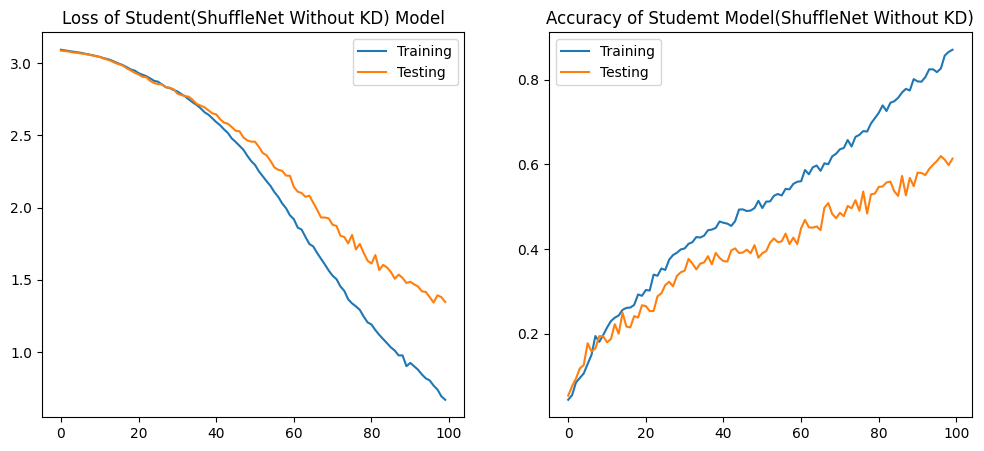

In [ ]:
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(1, 2, 1)
  
# showing image
plt.plot(train_loss,label='Training')
plt.plot(val_los,label='Testing')
plt.legend()
plt.title("Loss of Student(ShuffleNet Without KD) Model")
fig.add_subplot(1, 2, 2)
  
# showing image
plt.plot(train_acc,label='Training')
plt.plot(val_acc,label='Testing')
plt.legend()
plt.title("Accuracy of Studemt Model(ShuffleNet Without KD)")
plt.show()


In [ ]:
classification_report(smodel2,test_loader)

Accuracy of model is : 0.58
                                   precision    recall  f1-score   support

Alstonia Scholaris diseased (P2a)       0.56      0.49      0.52        47
 Alstonia Scholaris healthy (P2b)       0.61      0.34      0.44        32
             Arjun diseased (P1a)       0.66      0.73      0.69        45
              Arjun healthy (P1b)       0.59      0.40      0.47        43
              Bael diseased (P4b)       0.66      0.95      0.78        22
               Basil healthy (P8)       0.55      0.80      0.65        30
           Chinar diseased (P11b)       0.33      0.62      0.43        21
            Chinar healthy (P11a)       0.40      0.56      0.47        18
             Gauva diseased (P3b)       0.21      0.47      0.29        17
              Gauva healthy (P3a)       0.56      0.60      0.58        50
             Jamun diseased (P5b)       0.73      0.60      0.65        62
              Jamun healthy (P5a)       0.69      0.42      0.53       

In [ ]:
train_loss1 = []
val_los1 = []
train_acc1 = []
val_acc1 = []
for i in range(80):
        l1 = []
        l2 = []
        a1 = []
        a2 = []
        start = timer()
        for img,labels in tqdm(sloader1, desc='Training', unit=' unit',leave=False,colour='red'):
            



           # print(end - start)
            
            
            
            img = img.to(device)
            labels = labels.to(device)
            
            output = smodel1(img)
            #print(output.shape)
            probs = F.softmax(output,dim=1)
            max_prob,preds = torch.max(probs,dim=1)
            #print(len(labels))
            acc1 = (torch.sum(preds == labels).item() / len(preds))
            compare = tmodel(img)
            pdist = F.softmax(compare/4,dim=1)  ##Teacher distribution
            max_prob1,preds1 = torch.max(pdist,dim=1)   #Teacher output
            #accu=[]
            a1.append(acc1)
            #gg = np.mean(accu)
            soft_loss_teacher = nn.KLDivLoss(reduction='batchmean')(F.log_softmax(output /4, dim=1), pdist)
            loss = nn.CrossEntropyLoss()(output,labels)
            loss = 0.2*16*loss + 0.8*16*soft_loss_teacher
            l1.append(loss.item())
            loss.backward()
            optimizers.step()
            optimizers.zero_grad()
            
        for a,b in tqdm(val_loader, desc='Training', unit=' unit',leave=False,colour='red'):
                a = a.to(device)
                b = b.to(device)
                rr = smodel1(a)
                val_loss = nn.CrossEntropyLoss()(rr,b)
                l2.append(val_loss.item())
                probs = F.softmax(rr,dim=1)
                max_prob,preds = torch.max(probs,dim=1)
                acc = (torch.sum(preds == b).item() / len(preds))
                a2.append(acc)
        train_loss1.append(np.mean(l1))
        val_los1.append(np.mean(l2))
        train_acc1.append(np.mean(a1))
        val_acc1.append(np.mean(a2))
        end = timer()
        time = end - start
        time = time/60
        print(f'Epoch {i+1}/80: Train Loss==> {np.mean(l1):.2f} Val Loss==> {np.mean(l2):.2f} Train_Acc==> {np.mean(a1):.2f} Val_Acc==> {np.mean(a2):.2f}')   
        #print(i+1,loss,acc)

Epoch 1/80: Train Loss==> 12.97 Val Loss==> 3.08 Train_Acc==> 0.06 Val_Acc==> 0.07


Epoch 2/80: Train Loss==> 12.92 Val Loss==> 3.07 Train_Acc==> 0.10 Val_Acc==> 0.08


Epoch 3/80: Train Loss==> 12.91 Val Loss==> 3.06 Train_Acc==> 0.16 Val_Acc==> 0.13


Epoch 4/80: Train Loss==> 12.89 Val Loss==> 3.05 Train_Acc==> 0.21 Val_Acc==> 0.17


Epoch 5/80: Train Loss==> 12.76 Val Loss==> 3.03 Train_Acc==> 0.21 Val_Acc==> 0.19


Epoch 6/80: Train Loss==> 12.67 Val Loss==> 3.00 Train_Acc==> 0.23 Val_Acc==> 0.22


Epoch 7/80: Train Loss==> 12.61 Val Loss==> 2.97 Train_Acc==> 0.25 Val_Acc==> 0.24


Epoch 8/80: Train Loss==> 12.40 Val Loss==> 2.94 Train_Acc==> 0.28 Val_Acc==> 0.21


Epoch 9/80: Train Loss==> 12.26 Val Loss==> 2.90 Train_Acc==> 0.31 Val_Acc==> 0.22


Epoch 10/80: Train Loss==> 12.07 Val Loss==> 2.85 Train_Acc==> 0.31 Val_Acc==> 0.26


Epoch 11/80: Train Loss==> 11.90 Val Loss==> 2.81 Train_Acc==> 0.33 Val_Acc==> 0.27


Epoch 12/80: Train Loss==> 11.69 Val Loss==> 2.78 Train_Acc==> 0.37 Val_Acc==> 0.28


Epoch 13/80: Train Loss==> 11.47 Val Loss==> 2.74 Train_Acc==> 0.38 Val_Acc==> 0.30


Epoch 14/80: Train Loss==> 11.23 Val Loss==> 2.69 Train_Acc==> 0.41 Val_Acc==> 0.34


Epoch 15/80: Train Loss==> 11.04 Val Loss==> 2.67 Train_Acc==> 0.43 Val_Acc==> 0.32


Epoch 16/80: Train Loss==> 10.79 Val Loss==> 2.62 Train_Acc==> 0.44 Val_Acc==> 0.31


Epoch 17/80: Train Loss==> 10.54 Val Loss==> 2.55 Train_Acc==> 0.46 Val_Acc==> 0.36


Epoch 18/80: Train Loss==> 10.34 Val Loss==> 2.51 Train_Acc==> 0.47 Val_Acc==> 0.39


Epoch 19/80: Train Loss==> 10.02 Val Loss==> 2.46 Train_Acc==> 0.48 Val_Acc==> 0.39


Epoch 20/80: Train Loss==> 9.72 Val Loss==> 2.40 Train_Acc==> 0.51 Val_Acc==> 0.43


Epoch 21/80: Train Loss==> 9.47 Val Loss==> 2.35 Train_Acc==> 0.52 Val_Acc==> 0.41


Epoch 22/80: Train Loss==> 9.15 Val Loss==> 2.29 Train_Acc==> 0.53 Val_Acc==> 0.44


Epoch 23/80: Train Loss==> 8.84 Val Loss==> 2.23 Train_Acc==> 0.52 Val_Acc==> 0.44


Epoch 24/80: Train Loss==> 8.55 Val Loss==> 2.17 Train_Acc==> 0.53 Val_Acc==> 0.46


Epoch 25/80: Train Loss==> 8.25 Val Loss==> 2.15 Train_Acc==> 0.54 Val_Acc==> 0.47


Epoch 26/80: Train Loss==> 7.96 Val Loss==> 2.08 Train_Acc==> 0.56 Val_Acc==> 0.44


Epoch 27/80: Train Loss==> 7.70 Val Loss==> 2.04 Train_Acc==> 0.57 Val_Acc==> 0.47


Epoch 28/80: Train Loss==> 7.40 Val Loss==> 1.96 Train_Acc==> 0.57 Val_Acc==> 0.50


Epoch 29/80: Train Loss==> 7.11 Val Loss==> 1.96 Train_Acc==> 0.59 Val_Acc==> 0.49


Epoch 30/80: Train Loss==> 6.84 Val Loss==> 1.86 Train_Acc==> 0.60 Val_Acc==> 0.50


Epoch 31/80: Train Loss==> 6.58 Val Loss==> 1.86 Train_Acc==> 0.61 Val_Acc==> 0.48


Epoch 32/80: Train Loss==> 6.33 Val Loss==> 1.85 Train_Acc==> 0.62 Val_Acc==> 0.49


Epoch 33/80: Train Loss==> 6.17 Val Loss==> 1.74 Train_Acc==> 0.63 Val_Acc==> 0.53


Epoch 34/80: Train Loss==> 5.78 Val Loss==> 1.74 Train_Acc==> 0.65 Val_Acc==> 0.48


Epoch 35/80: Train Loss==> 5.63 Val Loss==> 1.67 Train_Acc==> 0.66 Val_Acc==> 0.51


Epoch 36/80: Train Loss==> 5.35 Val Loss==> 1.63 Train_Acc==> 0.69 Val_Acc==> 0.54


Epoch 37/80: Train Loss==> 5.13 Val Loss==> 1.64 Train_Acc==> 0.70 Val_Acc==> 0.50


Epoch 38/80: Train Loss==> 4.98 Val Loss==> 1.56 Train_Acc==> 0.70 Val_Acc==> 0.53


Epoch 39/80: Train Loss==> 4.73 Val Loss==> 1.56 Train_Acc==> 0.72 Val_Acc==> 0.53


Epoch 40/80: Train Loss==> 4.64 Val Loss==> 1.52 Train_Acc==> 0.74 Val_Acc==> 0.57


Epoch 41/80: Train Loss==> 4.43 Val Loss==> 1.50 Train_Acc==> 0.76 Val_Acc==> 0.55


Epoch 42/80: Train Loss==> 4.20 Val Loss==> 1.49 Train_Acc==> 0.77 Val_Acc==> 0.54


Epoch 43/80: Train Loss==> 4.11 Val Loss==> 1.47 Train_Acc==> 0.77 Val_Acc==> 0.57


Epoch 44/80: Train Loss==> 3.91 Val Loss==> 1.45 Train_Acc==> 0.80 Val_Acc==> 0.55


Epoch 45/80: Train Loss==> 3.79 Val Loss==> 1.32 Train_Acc==> 0.79 Val_Acc==> 0.58


Epoch 46/80: Train Loss==> 3.56 Val Loss==> 1.39 Train_Acc==> 0.81 Val_Acc==> 0.57


Epoch 47/80: Train Loss==> 3.51 Val Loss==> 1.34 Train_Acc==> 0.81 Val_Acc==> 0.60


Epoch 48/80: Train Loss==> 3.26 Val Loss==> 1.35 Train_Acc==> 0.84 Val_Acc==> 0.59


Epoch 49/80: Train Loss==> 3.10 Val Loss==> 1.27 Train_Acc==> 0.84 Val_Acc==> 0.61


Epoch 50/80: Train Loss==> 3.02 Val Loss==> 1.33 Train_Acc==> 0.84 Val_Acc==> 0.60


Epoch 51/80: Train Loss==> 3.00 Val Loss==> 1.28 Train_Acc==> 0.84 Val_Acc==> 0.60


Epoch 52/80: Train Loss==> 2.78 Val Loss==> 1.27 Train_Acc==> 0.87 Val_Acc==> 0.61


Epoch 53/80: Train Loss==> 2.73 Val Loss==> 1.25 Train_Acc==> 0.85 Val_Acc==> 0.64


Epoch 54/80: Train Loss==> 2.56 Val Loss==> 1.19 Train_Acc==> 0.89 Val_Acc==> 0.64


Epoch 55/80: Train Loss==> 2.51 Val Loss==> 1.23 Train_Acc==> 0.87 Val_Acc==> 0.63


Epoch 56/80: Train Loss==> 2.36 Val Loss==> 1.22 Train_Acc==> 0.89 Val_Acc==> 0.64


Epoch 57/80: Train Loss==> 2.23 Val Loss==> 1.28 Train_Acc==> 0.90 Val_Acc==> 0.64


Epoch 58/80: Train Loss==> 2.16 Val Loss==> 1.21 Train_Acc==> 0.90 Val_Acc==> 0.64


Epoch 59/80: Train Loss==> 2.07 Val Loss==> 1.17 Train_Acc==> 0.90 Val_Acc==> 0.65


Epoch 60/80: Train Loss==> 1.93 Val Loss==> 1.15 Train_Acc==> 0.91 Val_Acc==> 0.65


Epoch 61/80: Train Loss==> 1.99 Val Loss==> 1.22 Train_Acc==> 0.90 Val_Acc==> 0.62


Epoch 62/80: Train Loss==> 1.97 Val Loss==> 1.12 Train_Acc==> 0.91 Val_Acc==> 0.65


Epoch 63/80: Train Loss==> 1.78 Val Loss==> 1.19 Train_Acc==> 0.91 Val_Acc==> 0.65


Epoch 64/80: Train Loss==> 1.85 Val Loss==> 1.22 Train_Acc==> 0.91 Val_Acc==> 0.64


Epoch 65/80: Train Loss==> 1.63 Val Loss==> 1.17 Train_Acc==> 0.93 Val_Acc==> 0.63


Epoch 66/80: Train Loss==> 1.55 Val Loss==> 1.11 Train_Acc==> 0.94 Val_Acc==> 0.66


Epoch 67/80: Train Loss==> 1.52 Val Loss==> 1.23 Train_Acc==> 0.94 Val_Acc==> 0.63


Epoch 68/80: Train Loss==> 1.55 Val Loss==> 1.11 Train_Acc==> 0.95 Val_Acc==> 0.66


Epoch 69/80: Train Loss==> 1.47 Val Loss==> 1.09 Train_Acc==> 0.94 Val_Acc==> 0.68


Epoch 70/80: Train Loss==> 1.35 Val Loss==> 1.12 Train_Acc==> 0.95 Val_Acc==> 0.64


Epoch 71/80: Train Loss==> 1.37 Val Loss==> 1.11 Train_Acc==> 0.95 Val_Acc==> 0.69


Epoch 72/80: Train Loss==> 1.34 Val Loss==> 1.09 Train_Acc==> 0.95 Val_Acc==> 0.67


Epoch 73/80: Train Loss==> 1.29 Val Loss==> 1.17 Train_Acc==> 0.94 Val_Acc==> 0.63


Epoch 74/80: Train Loss==> 1.30 Val Loss==> 1.14 Train_Acc==> 0.95 Val_Acc==> 0.66


Epoch 75/80: Train Loss==> 1.19 Val Loss==> 1.10 Train_Acc==> 0.96 Val_Acc==> 0.65


Epoch 76/80: Train Loss==> 1.24 Val Loss==> 1.11 Train_Acc==> 0.96 Val_Acc==> 0.65


Epoch 77/80: Train Loss==> 1.12 Val Loss==> 1.07 Train_Acc==> 0.96 Val_Acc==> 0.70


Epoch 78/80: Train Loss==> 1.23 Val Loss==> 1.08 Train_Acc==> 0.95 Val_Acc==> 0.70


Epoch 79/80: Train Loss==> 1.10 Val Loss==> 1.19 Train_Acc==> 0.95 Val_Acc==> 0.64


Epoch 80/80: Train Loss==> 1.01 Val Loss==> 1.10 Train_Acc==> 0.98 Val_Acc==> 0.67


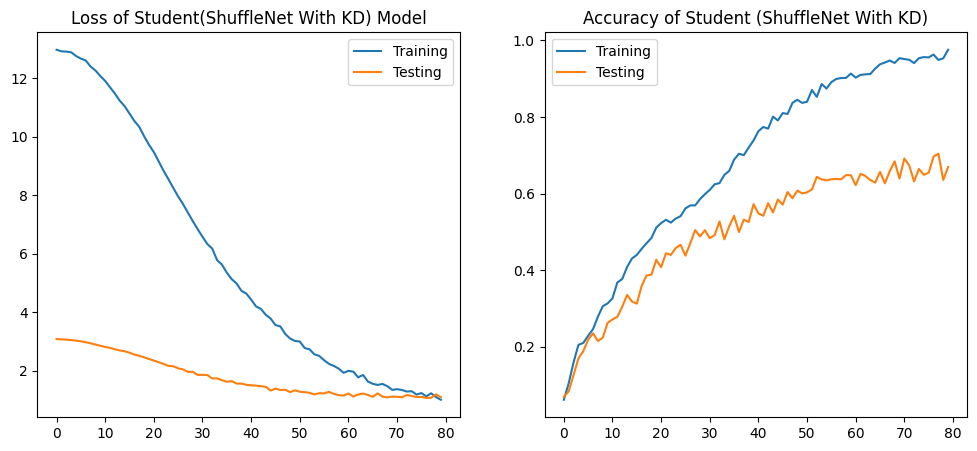

In [ ]:
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(1, 2, 1)
  
# showing image
plt.plot(train_loss1,label='Training')
plt.plot(val_los1,label='Testing')
plt.legend()
plt.title("Loss of Student(ShuffleNet With KD) Model")
fig.add_subplot(1, 2, 2)
  
# showing image
plt.plot(train_acc1,label='Training')
plt.plot(val_acc1,label='Testing')
plt.legend()
plt.title("Accuracy of Student (ShuffleNet With KD)")
plt.show()


In [ ]:
classification_report(smodel1,test_loader)

Accuracy of model is : 0.64
                                   precision    recall  f1-score   support

Alstonia Scholaris diseased (P2a)       0.57      0.49      0.53        47
 Alstonia Scholaris healthy (P2b)       0.44      0.47      0.45        32
             Arjun diseased (P1a)       0.80      0.73      0.77        45
              Arjun healthy (P1b)       0.74      0.72      0.73        43
              Bael diseased (P4b)       0.81      1.00      0.90        22
               Basil healthy (P8)       0.62      0.83      0.71        30
           Chinar diseased (P11b)       0.50      0.81      0.62        21
            Chinar healthy (P11a)       0.42      0.44      0.43        18
             Gauva diseased (P3b)       0.17      0.35      0.23        17
              Gauva healthy (P3a)       0.58      0.62      0.60        50
             Jamun diseased (P5b)       0.74      0.55      0.63        62
              Jamun healthy (P5a)       0.64      0.46      0.53       

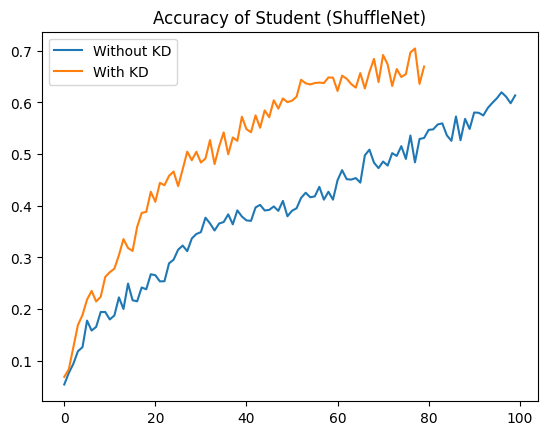

In [ ]:
plt.plot(val_acc,label='Without KD')
plt.plot(val_acc1,label='With KD')
plt.legend()
plt.title("Accuracy of Student (ShuffleNet)")
plt.show()


In [ ]:
import joblib
#joblib.dump(smodel4, 'csmodel_dnet.pkl')
joblib.dump(smodel1, 'shufflemodel_dnet.pkl')

['shufflemodel_dnet.pkl']

# ResNET Teacher

In [ ]:
smodel1 = torch.hub.load('pytorch/vision:v0.10.0', 'shufflenet_v2_x1_0', pretrained=1)
smodel1.fc = nn.Sequential(
    nn.Linear(in_features = 1024,out_features=22),
)

for name, child in smodel1.named_children():
   if name in ['stage3','stage4','conv5','fc']:
       print(name + ' is unfrozen')
       for param in child.parameters():
           param.requires_grad = True
   else:
       print(name + ' is frozen')
       for param in child.parameters():
           param.requires_grad = False

smodel2 = torch.hub.load('pytorch/vision:v0.10.0', 'shufflenet_v2_x1_0', pretrained=1)
smodel2.fc = nn.Sequential(
    nn.Linear(in_features = 1024,out_features=22),
)

for name, child in smodel2.named_children():
   if name in ['stage3','stage4','conv5','fc']:
       print(name + ' is unfrozen')
       for param in child.parameters():
           param.requires_grad = True
   else:
       print(name + ' is frozen')
       for param in child.parameters():
           param.requires_grad = False
optimizers = torch.optim.Adadelta(filter(lambda p: p.requires_grad, smodel1.parameters()), lr=0.02)
#smodel2 = smodel()
smodel1 = smodel1.cuda()
smodel2 = smodel2.cuda()
#optimizers = torch.optim.Adadelta(smodel1.parameters(), lr=0.6,weight_decay=1e-5)
optimizers2 = torch.optim.Adadelta(filter(lambda p: p.requires_grad, smodel2.parameters()), lr=0.02)

conv1 is frozen
maxpool is frozen
stage2 is frozen
stage3 is unfrozen
stage4 is unfrozen
conv5 is unfrozen
fc is unfrozen
conv1 is frozen
maxpool is frozen
stage2 is frozen
stage3 is unfrozen
stage4 is unfrozen
conv5 is unfrozen
fc is unfrozen


Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


In [ ]:
train_loss = []
val_los = []
train_acc = []
val_acc = []
for i in range(100):
        l1 = []
        l2 = []
        a1 = []
        a2 = []
        start = timer()
        for img,labels in tqdm(sloader1, desc='Training', unit=' unit',leave=False,colour='red'):
            



           # print(end - start)
            
            
            
            img = img.to(device)
            labels = labels.to(device)
            
            output = smodel2(img)
            #print(output.shape)
            probs = F.softmax(output,dim=1)
            max_prob,preds = torch.max(probs,dim=1)
            #print(len(labels))
            acc1 = (torch.sum(preds == labels).item() / len(preds))
            #compare = tmodel(img)
            #pdist = F.softmax(compare/4,dim=1)  ##Teacher distribution
            #max_prob1,preds1 = torch.max(pdist,dim=1)   #Teacher output
            #accu=[]
            a1.append(acc1)
            #gg = np.mean(accu)
            #soft_loss_teacher = nn.KLDivLoss(reduction='batchmean')(F.log_softmax(output / 4, dim=1), pdist)
            loss = nn.CrossEntropyLoss()(output,labels)
            #loss = 0.2*loss + 0.8*soft_loss_teacher
            l1.append(loss.item())
            loss.backward()
            optimizers2.step()
            optimizers2.zero_grad()
            
        for a,b in tqdm(val_loader, desc='Training', unit=' unit',leave=False,colour='red'):
                a = a.to(device)
                b = b.to(device)
                rr = smodel2(a)
                val_loss = nn.CrossEntropyLoss()(rr,b)
                l2.append(val_loss.item())
                probs = F.softmax(rr,dim=1)
                max_prob,preds = torch.max(probs,dim=1)
                acc = (torch.sum(preds == b).item() / len(preds))
                a2.append(acc)
        train_loss.append(np.mean(l1))
        val_los.append(np.mean(l2))
        train_acc.append(np.mean(a1))
        val_acc.append(np.mean(a2))
        end = timer()
        time = end - start
        time = time/60
        print(f'Epoch {i+1}/100: Train Loss==> {np.mean(l1):.2f} Val Loss==> {np.mean(l2):.2f} Train_Acc==> {np.mean(a1):.2f} Val_Acc==> {np.mean(a2):.2f}')   
        #print(i+1,loss,acc)

Epoch 1/100: Train Loss==> 3.09 Val Loss==> 3.09 Train_Acc==> 0.05 Val_Acc==> 0.05


Epoch 2/100: Train Loss==> 3.09 Val Loss==> 3.08 Train_Acc==> 0.06 Val_Acc==> 0.07


Epoch 3/100: Train Loss==> 3.08 Val Loss==> 3.08 Train_Acc==> 0.08 Val_Acc==> 0.09


Epoch 4/100: Train Loss==> 3.08 Val Loss==> 3.08 Train_Acc==> 0.12 Val_Acc==> 0.11


Epoch 5/100: Train Loss==> 3.07 Val Loss==> 3.07 Train_Acc==> 0.12 Val_Acc==> 0.12


Epoch 6/100: Train Loss==> 3.07 Val Loss==> 3.07 Train_Acc==> 0.15 Val_Acc==> 0.15


Epoch 7/100: Train Loss==> 3.06 Val Loss==> 3.07 Train_Acc==> 0.19 Val_Acc==> 0.14


Epoch 8/100: Train Loss==> 3.06 Val Loss==> 3.06 Train_Acc==> 0.21 Val_Acc==> 0.19


Epoch 9/100: Train Loss==> 3.05 Val Loss==> 3.06 Train_Acc==> 0.24 Val_Acc==> 0.21


Epoch 10/100: Train Loss==> 3.05 Val Loss==> 3.05 Train_Acc==> 0.25 Val_Acc==> 0.21


Epoch 11/100: Train Loss==> 3.04 Val Loss==> 3.05 Train_Acc==> 0.27 Val_Acc==> 0.22


Epoch 12/100: Train Loss==> 3.04 Val Loss==> 3.05 Train_Acc==> 0.29 Val_Acc==> 0.24


Epoch 13/100: Train Loss==> 3.03 Val Loss==> 3.04 Train_Acc==> 0.31 Val_Acc==> 0.25


Epoch 14/100: Train Loss==> 3.02 Val Loss==> 3.04 Train_Acc==> 0.34 Val_Acc==> 0.24


Epoch 15/100: Train Loss==> 3.01 Val Loss==> 3.03 Train_Acc==> 0.33 Val_Acc==> 0.24


Epoch 16/100: Train Loss==> 3.00 Val Loss==> 3.02 Train_Acc==> 0.35 Val_Acc==> 0.24


Epoch 17/100: Train Loss==> 2.99 Val Loss==> 3.01 Train_Acc==> 0.35 Val_Acc==> 0.25


Epoch 18/100: Train Loss==> 2.98 Val Loss==> 3.00 Train_Acc==> 0.36 Val_Acc==> 0.25


Epoch 19/100: Train Loss==> 2.97 Val Loss==> 2.99 Train_Acc==> 0.38 Val_Acc==> 0.24


Epoch 20/100: Train Loss==> 2.95 Val Loss==> 2.98 Train_Acc==> 0.37 Val_Acc==> 0.24


Epoch 21/100: Train Loss==> 2.94 Val Loss==> 2.96 Train_Acc==> 0.36 Val_Acc==> 0.26


Epoch 22/100: Train Loss==> 2.92 Val Loss==> 2.96 Train_Acc==> 0.37 Val_Acc==> 0.25


Epoch 23/100: Train Loss==> 2.89 Val Loss==> 2.94 Train_Acc==> 0.39 Val_Acc==> 0.24


Epoch 24/100: Train Loss==> 2.88 Val Loss==> 2.93 Train_Acc==> 0.39 Val_Acc==> 0.25


Epoch 25/100: Train Loss==> 2.86 Val Loss==> 2.90 Train_Acc==> 0.40 Val_Acc==> 0.27


Epoch 26/100: Train Loss==> 2.84 Val Loss==> 2.89 Train_Acc==> 0.41 Val_Acc==> 0.29


Epoch 27/100: Train Loss==> 2.82 Val Loss==> 2.88 Train_Acc==> 0.41 Val_Acc==> 0.30


Epoch 28/100: Train Loss==> 2.79 Val Loss==> 2.86 Train_Acc==> 0.41 Val_Acc==> 0.30


Epoch 29/100: Train Loss==> 2.77 Val Loss==> 2.86 Train_Acc==> 0.41 Val_Acc==> 0.29


Epoch 30/100: Train Loss==> 2.75 Val Loss==> 2.83 Train_Acc==> 0.42 Val_Acc==> 0.29


Epoch 31/100: Train Loss==> 2.73 Val Loss==> 2.82 Train_Acc==> 0.42 Val_Acc==> 0.32


Epoch 32/100: Train Loss==> 2.70 Val Loss==> 2.81 Train_Acc==> 0.44 Val_Acc==> 0.31


Epoch 33/100: Train Loss==> 2.67 Val Loss==> 2.78 Train_Acc==> 0.42 Val_Acc==> 0.30


Epoch 34/100: Train Loss==> 2.65 Val Loss==> 2.75 Train_Acc==> 0.43 Val_Acc==> 0.32


Epoch 35/100: Train Loss==> 2.63 Val Loss==> 2.73 Train_Acc==> 0.45 Val_Acc==> 0.34


Epoch 36/100: Train Loss==> 2.58 Val Loss==> 2.70 Train_Acc==> 0.44 Val_Acc==> 0.34


Epoch 37/100: Train Loss==> 2.56 Val Loss==> 2.68 Train_Acc==> 0.45 Val_Acc==> 0.36


Epoch 38/100: Train Loss==> 2.53 Val Loss==> 2.67 Train_Acc==> 0.46 Val_Acc==> 0.34


Epoch 39/100: Train Loss==> 2.51 Val Loss==> 2.63 Train_Acc==> 0.45 Val_Acc==> 0.33


Epoch 40/100: Train Loss==> 2.47 Val Loss==> 2.60 Train_Acc==> 0.47 Val_Acc==> 0.34


Epoch 41/100: Train Loss==> 2.44 Val Loss==> 2.63 Train_Acc==> 0.46 Val_Acc==> 0.34


Epoch 42/100: Train Loss==> 2.41 Val Loss==> 2.56 Train_Acc==> 0.46 Val_Acc==> 0.35


Epoch 43/100: Train Loss==> 2.37 Val Loss==> 2.55 Train_Acc==> 0.47 Val_Acc==> 0.34


Epoch 44/100: Train Loss==> 2.36 Val Loss==> 2.49 Train_Acc==> 0.46 Val_Acc==> 0.35


Epoch 45/100: Train Loss==> 2.30 Val Loss==> 2.50 Train_Acc==> 0.47 Val_Acc==> 0.38


Epoch 46/100: Train Loss==> 2.28 Val Loss==> 2.46 Train_Acc==> 0.49 Val_Acc==> 0.36


Epoch 47/100: Train Loss==> 2.25 Val Loss==> 2.44 Train_Acc==> 0.47 Val_Acc==> 0.35


Epoch 48/100: Train Loss==> 2.21 Val Loss==> 2.42 Train_Acc==> 0.49 Val_Acc==> 0.37


Epoch 49/100: Train Loss==> 2.20 Val Loss==> 2.39 Train_Acc==> 0.48 Val_Acc==> 0.36


Epoch 50/100: Train Loss==> 2.15 Val Loss==> 2.37 Train_Acc==> 0.50 Val_Acc==> 0.38


Epoch 51/100: Train Loss==> 2.12 Val Loss==> 2.34 Train_Acc==> 0.50 Val_Acc==> 0.38


Epoch 52/100: Train Loss==> 2.11 Val Loss==> 2.32 Train_Acc==> 0.49 Val_Acc==> 0.38


Epoch 53/100: Train Loss==> 2.06 Val Loss==> 2.29 Train_Acc==> 0.51 Val_Acc==> 0.40


Epoch 54/100: Train Loss==> 2.03 Val Loss==> 2.28 Train_Acc==> 0.53 Val_Acc==> 0.39


Epoch 55/100: Train Loss==> 2.02 Val Loss==> 2.27 Train_Acc==> 0.53 Val_Acc==> 0.39


Epoch 56/100: Train Loss==> 1.97 Val Loss==> 2.26 Train_Acc==> 0.54 Val_Acc==> 0.40


Epoch 57/100: Train Loss==> 1.95 Val Loss==> 2.21 Train_Acc==> 0.55 Val_Acc==> 0.42


Epoch 58/100: Train Loss==> 1.93 Val Loss==> 2.23 Train_Acc==> 0.55 Val_Acc==> 0.41


Epoch 59/100: Train Loss==> 1.89 Val Loss==> 2.19 Train_Acc==> 0.57 Val_Acc==> 0.39


Epoch 60/100: Train Loss==> 1.86 Val Loss==> 2.16 Train_Acc==> 0.57 Val_Acc==> 0.43


Epoch 61/100: Train Loss==> 1.83 Val Loss==> 2.13 Train_Acc==> 0.57 Val_Acc==> 0.41


Epoch 62/100: Train Loss==> 1.79 Val Loss==> 2.10 Train_Acc==> 0.58 Val_Acc==> 0.43


Epoch 63/100: Train Loss==> 1.76 Val Loss==> 2.07 Train_Acc==> 0.59 Val_Acc==> 0.45


Epoch 64/100: Train Loss==> 1.72 Val Loss==> 2.09 Train_Acc==> 0.60 Val_Acc==> 0.41


Epoch 65/100: Train Loss==> 1.70 Val Loss==> 2.05 Train_Acc==> 0.59 Val_Acc==> 0.44


Epoch 66/100: Train Loss==> 1.67 Val Loss==> 2.00 Train_Acc==> 0.59 Val_Acc==> 0.46


Epoch 67/100: Train Loss==> 1.66 Val Loss==> 1.97 Train_Acc==> 0.61 Val_Acc==> 0.45


Epoch 68/100: Train Loss==> 1.62 Val Loss==> 2.00 Train_Acc==> 0.60 Val_Acc==> 0.44


Epoch 69/100: Train Loss==> 1.59 Val Loss==> 1.95 Train_Acc==> 0.60 Val_Acc==> 0.47


Epoch 70/100: Train Loss==> 1.55 Val Loss==> 1.94 Train_Acc==> 0.62 Val_Acc==> 0.45


Epoch 71/100: Train Loss==> 1.51 Val Loss==> 1.92 Train_Acc==> 0.63 Val_Acc==> 0.46


Epoch 72/100: Train Loss==> 1.48 Val Loss==> 1.88 Train_Acc==> 0.62 Val_Acc==> 0.48


Epoch 73/100: Train Loss==> 1.47 Val Loss==> 1.88 Train_Acc==> 0.63 Val_Acc==> 0.46


Epoch 74/100: Train Loss==> 1.41 Val Loss==> 1.89 Train_Acc==> 0.64 Val_Acc==> 0.45


Epoch 75/100: Train Loss==> 1.38 Val Loss==> 1.87 Train_Acc==> 0.66 Val_Acc==> 0.46


Epoch 76/100: Train Loss==> 1.36 Val Loss==> 1.82 Train_Acc==> 0.65 Val_Acc==> 0.47


Epoch 77/100: Train Loss==> 1.32 Val Loss==> 1.76 Train_Acc==> 0.65 Val_Acc==> 0.48


Epoch 78/100: Train Loss==> 1.29 Val Loss==> 1.74 Train_Acc==> 0.67 Val_Acc==> 0.47


Epoch 79/100: Train Loss==> 1.25 Val Loss==> 1.74 Train_Acc==> 0.67 Val_Acc==> 0.50


Epoch 80/100: Train Loss==> 1.23 Val Loss==> 1.80 Train_Acc==> 0.67 Val_Acc==> 0.46


Epoch 81/100: Train Loss==> 1.18 Val Loss==> 1.72 Train_Acc==> 0.69 Val_Acc==> 0.47


Epoch 82/100: Train Loss==> 1.17 Val Loss==> 1.72 Train_Acc==> 0.69 Val_Acc==> 0.49


Epoch 83/100: Train Loss==> 1.14 Val Loss==> 1.65 Train_Acc==> 0.69 Val_Acc==> 0.51


Epoch 84/100: Train Loss==> 1.13 Val Loss==> 1.68 Train_Acc==> 0.71 Val_Acc==> 0.49


Epoch 85/100: Train Loss==> 1.07 Val Loss==> 1.60 Train_Acc==> 0.73 Val_Acc==> 0.51


Epoch 86/100: Train Loss==> 1.05 Val Loss==> 1.64 Train_Acc==> 0.73 Val_Acc==> 0.50


Epoch 87/100: Train Loss==> 1.01 Val Loss==> 1.64 Train_Acc==> 0.75 Val_Acc==> 0.50


Epoch 88/100: Train Loss==> 0.99 Val Loss==> 1.63 Train_Acc==> 0.74 Val_Acc==> 0.49


Epoch 89/100: Train Loss==> 1.00 Val Loss==> 1.61 Train_Acc==> 0.74 Val_Acc==> 0.50


Epoch 90/100: Train Loss==> 0.96 Val Loss==> 1.61 Train_Acc==> 0.76 Val_Acc==> 0.49


Epoch 91/100: Train Loss==> 0.94 Val Loss==> 1.57 Train_Acc==> 0.75 Val_Acc==> 0.53


Epoch 92/100: Train Loss==> 0.91 Val Loss==> 1.51 Train_Acc==> 0.78 Val_Acc==> 0.53


Epoch 93/100: Train Loss==> 0.91 Val Loss==> 1.56 Train_Acc==> 0.76 Val_Acc==> 0.51


Epoch 94/100: Train Loss==> 0.86 Val Loss==> 1.52 Train_Acc==> 0.78 Val_Acc==> 0.52


Epoch 95/100: Train Loss==> 0.83 Val Loss==> 1.52 Train_Acc==> 0.79 Val_Acc==> 0.54


Epoch 96/100: Train Loss==> 0.82 Val Loss==> 1.52 Train_Acc==> 0.80 Val_Acc==> 0.52


Epoch 97/100: Train Loss==> 0.80 Val Loss==> 1.46 Train_Acc==> 0.81 Val_Acc==> 0.57


Epoch 98/100: Train Loss==> 0.79 Val Loss==> 1.47 Train_Acc==> 0.80 Val_Acc==> 0.54


Epoch 99/100: Train Loss==> 0.78 Val Loss==> 1.50 Train_Acc==> 0.81 Val_Acc==> 0.54


Epoch 100/100: Train Loss==> 0.74 Val Loss==> 1.44 Train_Acc==> 0.83 Val_Acc==> 0.57


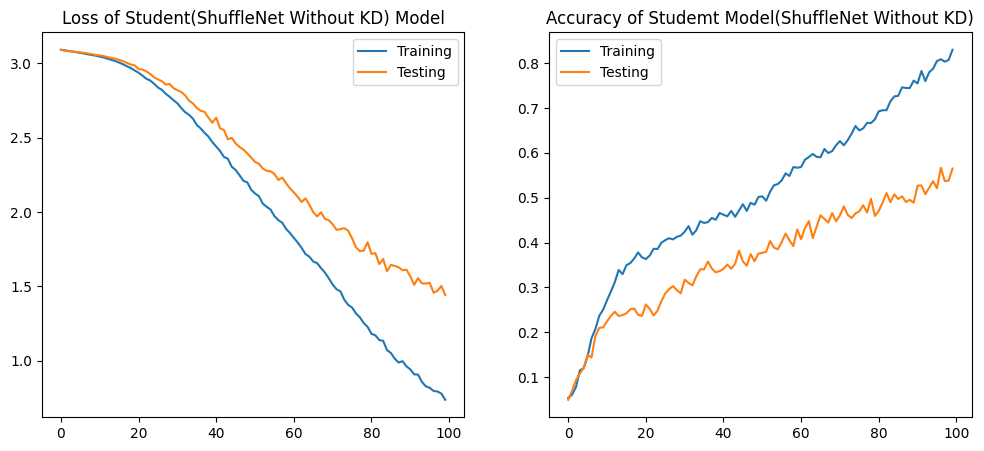

In [ ]:
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(1, 2, 1)
  
# showing image
plt.plot(train_loss,label='Training')
plt.plot(val_los,label='Testing')
plt.legend()
plt.title("Loss of Student(ShuffleNet Without KD) Model")
fig.add_subplot(1, 2, 2)
  
# showing image
plt.plot(train_acc,label='Training')
plt.plot(val_acc,label='Testing')
plt.legend()
plt.title("Accuracy of Studemt Model(ShuffleNet Without KD)")
plt.show()


In [ ]:
classification_report(smodel2,test_loader)

Accuracy of model is : 0.53
                                   precision    recall  f1-score   support

Alstonia Scholaris diseased (P2a)       0.45      0.28      0.34        47
 Alstonia Scholaris healthy (P2b)       0.33      0.44      0.37        32
             Arjun diseased (P1a)       0.39      0.47      0.42        45
              Arjun healthy (P1b)       0.64      0.16      0.26        43
              Bael diseased (P4b)       0.69      1.00      0.81        22
               Basil healthy (P8)       0.36      0.83      0.50        30
           Chinar diseased (P11b)       0.36      0.81      0.50        21
            Chinar healthy (P11a)       0.30      0.39      0.34        18
             Gauva diseased (P3b)       0.16      0.24      0.19        17
              Gauva healthy (P3a)       0.56      0.58      0.57        50
             Jamun diseased (P5b)       0.69      0.60      0.64        62
              Jamun healthy (P5a)       0.63      0.41      0.49       

In [ ]:
train_loss1 = []
val_los1 = []
train_acc1 = []
val_acc1 = []
for i in range(80):
        l1 = []
        l2 = []
        a1 = []
        a2 = []
        start = timer()
        for img,labels in tqdm(sloader1, desc='Training', unit=' unit',leave=False,colour='red'):
            



           # print(end - start)
            
            
            
            img = img.to(device)
            labels = labels.to(device)
            
            output = smodel1(img)
            #print(output.shape)
            probs = F.softmax(output,dim=1)
            max_prob,preds = torch.max(probs,dim=1)
            #print(len(labels))
            acc1 = (torch.sum(preds == labels).item() / len(preds))
            compare = tmodel(img)
            pdist = F.softmax(compare/4,dim=1)  ##Teacher distribution
            max_prob1,preds1 = torch.max(pdist,dim=1)   #Teacher output
            #accu=[]
            a1.append(acc1)
            #gg = np.mean(accu)
            soft_loss_teacher = nn.KLDivLoss(reduction='batchmean')(F.log_softmax(output /4, dim=1), pdist)
            loss = nn.CrossEntropyLoss()(output,labels)
            loss = 0.2*16*loss + 0.8*16*soft_loss_teacher
            l1.append(loss.item())
            loss.backward()
            optimizers.step()
            optimizers.zero_grad()
            
        for a,b in tqdm(val_loader, desc='Training', unit=' unit',leave=False,colour='red'):
                a = a.to(device)
                b = b.to(device)
                rr = smodel1(a)
                val_loss = nn.CrossEntropyLoss()(rr,b)
                l2.append(val_loss.item())
                probs = F.softmax(rr,dim=1)
                max_prob,preds = torch.max(probs,dim=1)
                acc = (torch.sum(preds == b).item() / len(preds))
                a2.append(acc)
        train_loss1.append(np.mean(l1))
        val_los1.append(np.mean(l2))
        train_acc1.append(np.mean(a1))
        val_acc1.append(np.mean(a2))
        end = timer()
        time = end - start
        time = time/60
        print(f'Epoch {i+1}/80: Train Loss==> {np.mean(l1):.2f} Val Loss==> {np.mean(l2):.2f} Train_Acc==> {np.mean(a1):.2f} Val_Acc==> {np.mean(a2):.2f}')   
        #print(i+1,loss,acc)

Epoch 1/80: Train Loss==> 13.01 Val Loss==> 3.09 Train_Acc==> 0.05 Val_Acc==> 0.07


Epoch 2/80: Train Loss==> 12.97 Val Loss==> 3.08 Train_Acc==> 0.09 Val_Acc==> 0.10


Epoch 3/80: Train Loss==> 12.90 Val Loss==> 3.07 Train_Acc==> 0.13 Val_Acc==> 0.13


Epoch 4/80: Train Loss==> 12.85 Val Loss==> 3.05 Train_Acc==> 0.18 Val_Acc==> 0.16


Epoch 5/80: Train Loss==> 12.77 Val Loss==> 3.04 Train_Acc==> 0.19 Val_Acc==> 0.16


Epoch 6/80: Train Loss==> 12.71 Val Loss==> 3.01 Train_Acc==> 0.23 Val_Acc==> 0.21


Epoch 7/80: Train Loss==> 12.60 Val Loss==> 2.99 Train_Acc==> 0.26 Val_Acc==> 0.21


Epoch 8/80: Train Loss==> 12.47 Val Loss==> 2.95 Train_Acc==> 0.28 Val_Acc==> 0.22


Epoch 9/80: Train Loss==> 12.33 Val Loss==> 2.91 Train_Acc==> 0.30 Val_Acc==> 0.25


Epoch 10/80: Train Loss==> 12.20 Val Loss==> 2.87 Train_Acc==> 0.34 Val_Acc==> 0.29


Epoch 11/80: Train Loss==> 12.02 Val Loss==> 2.83 Train_Acc==> 0.37 Val_Acc==> 0.30


Epoch 12/80: Train Loss==> 11.88 Val Loss==> 2.79 Train_Acc==> 0.40 Val_Acc==> 0.32


Epoch 13/80: Train Loss==> 11.70 Val Loss==> 2.76 Train_Acc==> 0.41 Val_Acc==> 0.32


Epoch 14/80: Train Loss==> 11.49 Val Loss==> 2.72 Train_Acc==> 0.42 Val_Acc==> 0.36


Epoch 15/80: Train Loss==> 11.31 Val Loss==> 2.66 Train_Acc==> 0.45 Val_Acc==> 0.36


Epoch 16/80: Train Loss==> 11.12 Val Loss==> 2.62 Train_Acc==> 0.46 Val_Acc==> 0.37


Epoch 17/80: Train Loss==> 10.83 Val Loss==> 2.57 Train_Acc==> 0.46 Val_Acc==> 0.37


Epoch 18/80: Train Loss==> 10.59 Val Loss==> 2.52 Train_Acc==> 0.46 Val_Acc==> 0.38


Epoch 19/80: Train Loss==> 10.34 Val Loss==> 2.47 Train_Acc==> 0.47 Val_Acc==> 0.40


Epoch 20/80: Train Loss==> 10.07 Val Loss==> 2.44 Train_Acc==> 0.49 Val_Acc==> 0.39


Epoch 21/80: Train Loss==> 9.82 Val Loss==> 2.38 Train_Acc==> 0.49 Val_Acc==> 0.42


Epoch 22/80: Train Loss==> 9.52 Val Loss==> 2.33 Train_Acc==> 0.49 Val_Acc==> 0.41


Epoch 23/80: Train Loss==> 9.30 Val Loss==> 2.27 Train_Acc==> 0.51 Val_Acc==> 0.42


Epoch 24/80: Train Loss==> 9.00 Val Loss==> 2.21 Train_Acc==> 0.52 Val_Acc==> 0.45


Epoch 25/80: Train Loss==> 8.77 Val Loss==> 2.17 Train_Acc==> 0.52 Val_Acc==> 0.44


Epoch 26/80: Train Loss==> 8.44 Val Loss==> 2.12 Train_Acc==> 0.53 Val_Acc==> 0.45


Epoch 27/80: Train Loss==> 8.17 Val Loss==> 2.05 Train_Acc==> 0.55 Val_Acc==> 0.45


Epoch 28/80: Train Loss==> 7.79 Val Loss==> 1.99 Train_Acc==> 0.57 Val_Acc==> 0.48


Epoch 29/80: Train Loss==> 7.57 Val Loss==> 1.99 Train_Acc==> 0.59 Val_Acc==> 0.47


Epoch 30/80: Train Loss==> 7.25 Val Loss==> 1.89 Train_Acc==> 0.59 Val_Acc==> 0.49


Epoch 31/80: Train Loss==> 6.98 Val Loss==> 1.87 Train_Acc==> 0.62 Val_Acc==> 0.47


Epoch 32/80: Train Loss==> 6.70 Val Loss==> 1.77 Train_Acc==> 0.63 Val_Acc==> 0.53


Epoch 33/80: Train Loss==> 6.35 Val Loss==> 1.78 Train_Acc==> 0.65 Val_Acc==> 0.51


Epoch 34/80: Train Loss==> 6.06 Val Loss==> 1.75 Train_Acc==> 0.67 Val_Acc==> 0.50


Epoch 35/80: Train Loss==> 5.82 Val Loss==> 1.67 Train_Acc==> 0.69 Val_Acc==> 0.54


Epoch 36/80: Train Loss==> 5.62 Val Loss==> 1.63 Train_Acc==> 0.69 Val_Acc==> 0.54


Epoch 37/80: Train Loss==> 5.33 Val Loss==> 1.62 Train_Acc==> 0.70 Val_Acc==> 0.54


Epoch 38/80: Train Loss==> 5.10 Val Loss==> 1.52 Train_Acc==> 0.73 Val_Acc==> 0.58


Epoch 39/80: Train Loss==> 4.82 Val Loss==> 1.52 Train_Acc==> 0.74 Val_Acc==> 0.57


Epoch 40/80: Train Loss==> 4.59 Val Loss==> 1.47 Train_Acc==> 0.76 Val_Acc==> 0.57


Epoch 41/80: Train Loss==> 4.46 Val Loss==> 1.43 Train_Acc==> 0.77 Val_Acc==> 0.58


Epoch 42/80: Train Loss==> 4.21 Val Loss==> 1.41 Train_Acc==> 0.78 Val_Acc==> 0.59


Epoch 43/80: Train Loss==> 4.05 Val Loss==> 1.39 Train_Acc==> 0.79 Val_Acc==> 0.59


Epoch 44/80: Train Loss==> 3.86 Val Loss==> 1.36 Train_Acc==> 0.81 Val_Acc==> 0.58


Epoch 45/80: Train Loss==> 3.76 Val Loss==> 1.33 Train_Acc==> 0.80 Val_Acc==> 0.65


Epoch 46/80: Train Loss==> 3.61 Val Loss==> 1.28 Train_Acc==> 0.81 Val_Acc==> 0.61


Epoch 47/80: Train Loss==> 3.47 Val Loss==> 1.27 Train_Acc==> 0.83 Val_Acc==> 0.63


Epoch 48/80: Train Loss==> 3.25 Val Loss==> 1.27 Train_Acc==> 0.84 Val_Acc==> 0.65


Epoch 49/80: Train Loss==> 3.15 Val Loss==> 1.33 Train_Acc==> 0.84 Val_Acc==> 0.61


Epoch 50/80: Train Loss==> 3.02 Val Loss==> 1.33 Train_Acc==> 0.85 Val_Acc==> 0.61


Epoch 51/80: Train Loss==> 2.83 Val Loss==> 1.20 Train_Acc==> 0.87 Val_Acc==> 0.64


Epoch 52/80: Train Loss==> 2.79 Val Loss==> 1.21 Train_Acc==> 0.86 Val_Acc==> 0.64


Epoch 53/80: Train Loss==> 2.73 Val Loss==> 1.21 Train_Acc==> 0.87 Val_Acc==> 0.64


Epoch 54/80: Train Loss==> 2.46 Val Loss==> 1.18 Train_Acc==> 0.90 Val_Acc==> 0.65


Epoch 55/80: Train Loss==> 2.32 Val Loss==> 1.16 Train_Acc==> 0.90 Val_Acc==> 0.65


Epoch 56/80: Train Loss==> 2.31 Val Loss==> 1.17 Train_Acc==> 0.90 Val_Acc==> 0.65


Epoch 57/80: Train Loss==> 2.30 Val Loss==> 1.19 Train_Acc==> 0.90 Val_Acc==> 0.66


Epoch 58/80: Train Loss==> 2.13 Val Loss==> 1.18 Train_Acc==> 0.89 Val_Acc==> 0.63


Epoch 59/80: Train Loss==> 2.22 Val Loss==> 1.23 Train_Acc==> 0.91 Val_Acc==> 0.63


Epoch 60/80: Train Loss==> 1.98 Val Loss==> 1.11 Train_Acc==> 0.91 Val_Acc==> 0.65


Epoch 61/80: Train Loss==> 1.84 Val Loss==> 1.11 Train_Acc==> 0.93 Val_Acc==> 0.65


Epoch 62/80: Train Loss==> 1.83 Val Loss==> 1.12 Train_Acc==> 0.93 Val_Acc==> 0.69


Epoch 63/80: Train Loss==> 1.77 Val Loss==> 1.10 Train_Acc==> 0.93 Val_Acc==> 0.67


Epoch 64/80: Train Loss==> 1.68 Val Loss==> 1.08 Train_Acc==> 0.94 Val_Acc==> 0.68


Epoch 65/80: Train Loss==> 1.59 Val Loss==> 1.10 Train_Acc==> 0.94 Val_Acc==> 0.66


Epoch 66/80: Train Loss==> 1.58 Val Loss==> 1.13 Train_Acc==> 0.95 Val_Acc==> 0.67


Epoch 67/80: Train Loss==> 1.55 Val Loss==> 1.09 Train_Acc==> 0.94 Val_Acc==> 0.69


Epoch 68/80: Train Loss==> 1.61 Val Loss==> 1.12 Train_Acc==> 0.94 Val_Acc==> 0.67


Epoch 69/80: Train Loss==> 1.42 Val Loss==> 1.11 Train_Acc==> 0.95 Val_Acc==> 0.68


Epoch 70/80: Train Loss==> 1.34 Val Loss==> 1.12 Train_Acc==> 0.95 Val_Acc==> 0.67


Epoch 71/80: Train Loss==> 1.43 Val Loss==> 1.09 Train_Acc==> 0.94 Val_Acc==> 0.69


Epoch 72/80: Train Loss==> 1.26 Val Loss==> 1.08 Train_Acc==> 0.96 Val_Acc==> 0.70


Epoch 73/80: Train Loss==> 1.30 Val Loss==> 1.02 Train_Acc==> 0.96 Val_Acc==> 0.70


Epoch 74/80: Train Loss==> 1.20 Val Loss==> 1.12 Train_Acc==> 0.96 Val_Acc==> 0.67


Epoch 75/80: Train Loss==> 1.14 Val Loss==> 1.07 Train_Acc==> 0.97 Val_Acc==> 0.67


Epoch 76/80: Train Loss==> 1.16 Val Loss==> 1.12 Train_Acc==> 0.96 Val_Acc==> 0.66


Epoch 77/80: Train Loss==> 1.11 Val Loss==> 1.12 Train_Acc==> 0.97 Val_Acc==> 0.68


Epoch 78/80: Train Loss==> 1.07 Val Loss==> 1.07 Train_Acc==> 0.96 Val_Acc==> 0.69


Epoch 79/80: Train Loss==> 1.17 Val Loss==> 1.07 Train_Acc==> 0.96 Val_Acc==> 0.69


Epoch 80/80: Train Loss==> 1.06 Val Loss==> 1.09 Train_Acc==> 0.97 Val_Acc==> 0.68


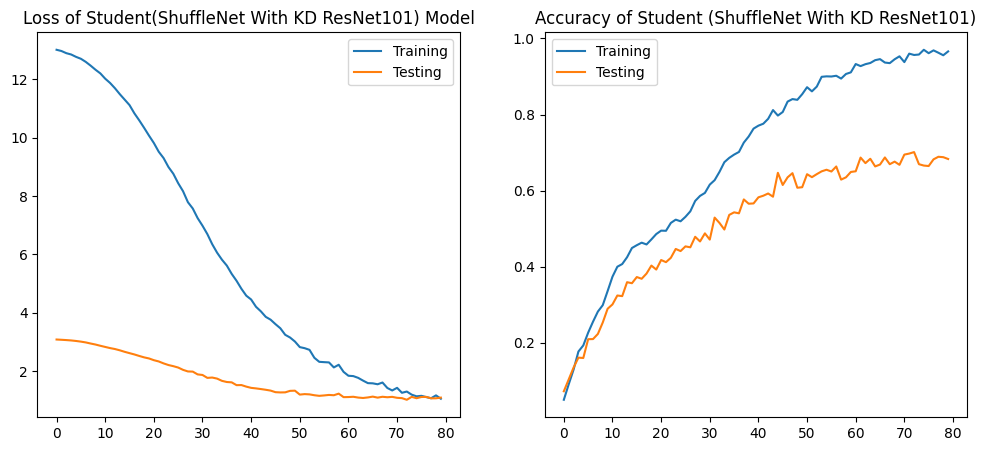

In [ ]:
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(1, 2, 1)
  
# showing image
plt.plot(train_loss1,label='Training')
plt.plot(val_los1,label='Testing')
plt.legend()
plt.title("Loss of Student(ShuffleNet With KD ResNet101) Model")
fig.add_subplot(1, 2, 2)
  
# showing image
plt.plot(train_acc1,label='Training')
plt.plot(val_acc1,label='Testing')
plt.legend()
plt.title("Accuracy of Student (ShuffleNet With KD ResNet101)")
plt.show()


In [ ]:
classification_report(smodel1,test_loader)

Accuracy of model is : 0.62
                                   precision    recall  f1-score   support

Alstonia Scholaris diseased (P2a)       0.62      0.55      0.58        47
 Alstonia Scholaris healthy (P2b)       0.41      0.47      0.43        32
             Arjun diseased (P1a)       0.73      0.73      0.73        45
              Arjun healthy (P1b)       0.73      0.70      0.71        43
              Bael diseased (P4b)       0.73      1.00      0.85        22
               Basil healthy (P8)       0.64      0.77      0.70        30
           Chinar diseased (P11b)       0.44      0.71      0.55        21
            Chinar healthy (P11a)       0.29      0.44      0.35        18
             Gauva diseased (P3b)       0.21      0.41      0.28        17
              Gauva healthy (P3a)       0.59      0.54      0.56        50
             Jamun diseased (P5b)       0.79      0.60      0.68        62
              Jamun healthy (P5a)       0.62      0.39      0.48       

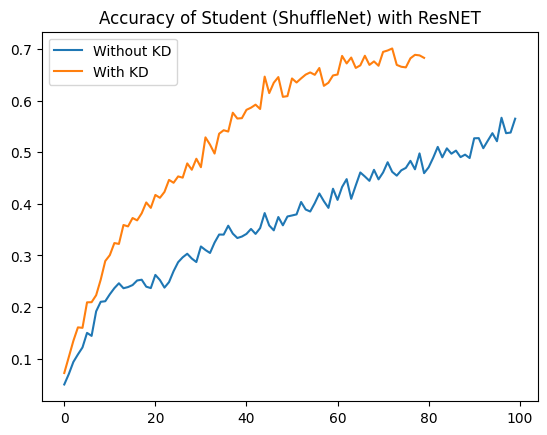

In [ ]:
plt.plot(val_acc,label='Without KD')
plt.plot(val_acc1,label='With KD')
plt.legend()
plt.title("Accuracy of Student (ShuffleNet) with ResNET")
plt.show()


In [ ]:
joblib.dump(smodel1, 'shufflemodel_rnet.pkl')

['shufflemodel_rnet.pkl']

In [ ]:
import torch
import torch.nn as nn

class smodel(nn.Module):
    def __init__(self):
        super(smodel, self).__init__()
        
        # Define convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=5, stride=2)
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=8, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(in_channels=8, out_channels=8, kernel_size=3, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv4 = nn.Conv2d(in_channels=8, out_channels=8, kernel_size=3, padding=1)
        self.relu4 = nn.ReLU()
        # Define fully connected layers
        self.fc1 = nn.Linear(in_features=392 , out_features=22)
        #self.relu3 = nn.ReLU()
        #self.fc2 = nn.Linear(in_features=250, out_features=22)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.pool3(x)
        x = self.conv4(x)
        x = self.relu4(x)
        #print(x.shape)
        x = torch.flatten(x,1)
        #print(x.shape)
        x = self.fc1(x)
        #x = self.relu3(x)
        #x = self.fc2(x)
        #print(x.shape)
        return x


In [ ]:
smodel3 = smodel()
smodel3 = smodel3.cuda()
smodel4 = smodel()
smodel4 = smodel4.cuda()
optimizers = torch.optim.SGD(smodel4.parameters(), lr=0.03,momentum=0.9)
optimizers2 = torch.optim.Adadelta(smodel3.parameters(), lr=0.3)

In [ ]:
train_loss = []
val_los = []
train_acc = []
val_acc = []
for i in range(100):
        l1 = []
        l2 = []
        a1 = []
        a2 = []
        start = timer()
        for img,labels in tqdm(sloader2, desc='Training', unit=' unit',leave=False,colour='red'):
            



           # print(end - start)
            
            
            
            img = img.to(device)
            labels = labels.to(device)
            
            output = smodel3(img)
            #print(output.shape)
            probs = F.softmax(output,dim=1)
            max_prob,preds = torch.max(probs,dim=1)
            #print(len(labels))
            acc1 = (torch.sum(preds == labels).item() / len(preds))
            #compare = smodel3(img)
            #pdist = F.softmax(compare/4,dim=1)  ##Teacher distribution
            #max_prob1,preds1 = torch.max(pdist,dim=1)   #Teacher output
            #accu=[]
            a1.append(acc1)
            #gg = np.mean(accu)
            #soft_loss_teacher = nn.KLDivLoss(reduction='batchmean')(F.log_softmax(output / 4, dim=1), pdist)
            loss = nn.CrossEntropyLoss()(output,labels)
            #loss = 0.2*loss + 0.8*soft_loss_teacher
            l1.append(loss.item())
            loss.backward()
            optimizers2.step()
            optimizers2.zero_grad()
            
        for a,b in tqdm(val_loader, desc='Training', unit=' unit',leave=False,colour='red'):
                a = a.to(device)
                b = b.to(device)
                rr = smodel3(a)
                val_loss = nn.CrossEntropyLoss()(rr,b)
                l2.append(val_loss.item())
                probs = F.softmax(rr,dim=1)
                max_prob,preds = torch.max(probs,dim=1)
                acc = (torch.sum(preds == b).item() / len(preds))
                a2.append(acc)
        train_loss.append(np.mean(l1))
        val_los.append(np.mean(l2))
        train_acc.append(np.mean(a1))
        val_acc.append(np.mean(a2))
        end = timer()
        time = end - start
        time = time/60
        print(f'Epoch {i+1}/100: Train Loss==> {np.mean(l1):.2f} Val Loss==> {np.mean(l2):.2f} Train_Acc==> {np.mean(a1):.2f} Val_Acc==> {np.mean(a2):.2f}')   
        #print(i+1,loss,acc)

Epoch 1/100: Train Loss==> 3.09 Val Loss==> 3.08 Train_Acc==> 0.05 Val_Acc==> 0.03


Epoch 2/100: Train Loss==> 3.03 Val Loss==> 2.81 Train_Acc==> 0.06 Val_Acc==> 0.08


Epoch 3/100: Train Loss==> 2.83 Val Loss==> 2.58 Train_Acc==> 0.09 Val_Acc==> 0.12


Epoch 4/100: Train Loss==> 2.72 Val Loss==> 2.93 Train_Acc==> 0.11 Val_Acc==> 0.09


Epoch 5/100: Train Loss==> 2.63 Val Loss==> 2.66 Train_Acc==> 0.13 Val_Acc==> 0.13


Epoch 6/100: Train Loss==> 2.56 Val Loss==> 2.55 Train_Acc==> 0.14 Val_Acc==> 0.13


Epoch 7/100: Train Loss==> 2.51 Val Loss==> 2.42 Train_Acc==> 0.17 Val_Acc==> 0.20


Epoch 8/100: Train Loss==> 2.48 Val Loss==> 3.15 Train_Acc==> 0.18 Val_Acc==> 0.11


Epoch 9/100: Train Loss==> 2.42 Val Loss==> 2.48 Train_Acc==> 0.20 Val_Acc==> 0.16


Epoch 10/100: Train Loss==> 2.38 Val Loss==> 2.39 Train_Acc==> 0.21 Val_Acc==> 0.16


Epoch 11/100: Train Loss==> 2.36 Val Loss==> 2.71 Train_Acc==> 0.23 Val_Acc==> 0.14


Epoch 12/100: Train Loss==> 2.29 Val Loss==> 2.48 Train_Acc==> 0.24 Val_Acc==> 0.12


Epoch 13/100: Train Loss==> 2.27 Val Loss==> 2.55 Train_Acc==> 0.25 Val_Acc==> 0.21


Epoch 14/100: Train Loss==> 2.23 Val Loss==> 2.38 Train_Acc==> 0.27 Val_Acc==> 0.17


Epoch 15/100: Train Loss==> 2.22 Val Loss==> 2.43 Train_Acc==> 0.30 Val_Acc==> 0.17


Epoch 16/100: Train Loss==> 2.17 Val Loss==> 2.28 Train_Acc==> 0.30 Val_Acc==> 0.22


Epoch 17/100: Train Loss==> 2.13 Val Loss==> 2.34 Train_Acc==> 0.32 Val_Acc==> 0.21


Epoch 18/100: Train Loss==> 2.10 Val Loss==> 2.25 Train_Acc==> 0.31 Val_Acc==> 0.27


Epoch 19/100: Train Loss==> 2.06 Val Loss==> 2.41 Train_Acc==> 0.34 Val_Acc==> 0.21


Epoch 20/100: Train Loss==> 2.05 Val Loss==> 2.15 Train_Acc==> 0.35 Val_Acc==> 0.30


Epoch 21/100: Train Loss==> 2.00 Val Loss==> 2.27 Train_Acc==> 0.36 Val_Acc==> 0.21


Epoch 22/100: Train Loss==> 1.98 Val Loss==> 2.59 Train_Acc==> 0.37 Val_Acc==> 0.17


Epoch 23/100: Train Loss==> 1.95 Val Loss==> 2.39 Train_Acc==> 0.39 Val_Acc==> 0.27


Epoch 24/100: Train Loss==> 1.89 Val Loss==> 2.42 Train_Acc==> 0.41 Val_Acc==> 0.26


Epoch 25/100: Train Loss==> 1.89 Val Loss==> 2.14 Train_Acc==> 0.40 Val_Acc==> 0.28


Epoch 26/100: Train Loss==> 1.86 Val Loss==> 2.10 Train_Acc==> 0.41 Val_Acc==> 0.32


Epoch 27/100: Train Loss==> 1.80 Val Loss==> 2.08 Train_Acc==> 0.42 Val_Acc==> 0.33


Epoch 28/100: Train Loss==> 1.80 Val Loss==> 2.06 Train_Acc==> 0.42 Val_Acc==> 0.33


Epoch 29/100: Train Loss==> 1.76 Val Loss==> 2.30 Train_Acc==> 0.44 Val_Acc==> 0.25


Epoch 30/100: Train Loss==> 1.75 Val Loss==> 2.08 Train_Acc==> 0.44 Val_Acc==> 0.34


Epoch 31/100: Train Loss==> 1.74 Val Loss==> 2.27 Train_Acc==> 0.44 Val_Acc==> 0.25


Epoch 32/100: Train Loss==> 1.70 Val Loss==> 2.23 Train_Acc==> 0.45 Val_Acc==> 0.26


Epoch 33/100: Train Loss==> 1.66 Val Loss==> 2.53 Train_Acc==> 0.46 Val_Acc==> 0.31


Epoch 34/100: Train Loss==> 1.65 Val Loss==> 2.01 Train_Acc==> 0.48 Val_Acc==> 0.34


Epoch 35/100: Train Loss==> 1.61 Val Loss==> 2.18 Train_Acc==> 0.49 Val_Acc==> 0.30


Epoch 36/100: Train Loss==> 1.60 Val Loss==> 1.89 Train_Acc==> 0.49 Val_Acc==> 0.40


Epoch 37/100: Train Loss==> 1.62 Val Loss==> 1.89 Train_Acc==> 0.50 Val_Acc==> 0.39


Epoch 38/100: Train Loss==> 1.57 Val Loss==> 1.97 Train_Acc==> 0.50 Val_Acc==> 0.44


Epoch 39/100: Train Loss==> 1.56 Val Loss==> 2.11 Train_Acc==> 0.50 Val_Acc==> 0.33


Epoch 40/100: Train Loss==> 1.55 Val Loss==> 1.95 Train_Acc==> 0.50 Val_Acc==> 0.36


Epoch 41/100: Train Loss==> 1.52 Val Loss==> 2.11 Train_Acc==> 0.52 Val_Acc==> 0.35


Epoch 42/100: Train Loss==> 1.51 Val Loss==> 2.31 Train_Acc==> 0.51 Val_Acc==> 0.35


Epoch 43/100: Train Loss==> 1.51 Val Loss==> 1.81 Train_Acc==> 0.52 Val_Acc==> 0.46


Epoch 44/100: Train Loss==> 1.49 Val Loss==> 1.82 Train_Acc==> 0.52 Val_Acc==> 0.41


Epoch 45/100: Train Loss==> 1.46 Val Loss==> 1.86 Train_Acc==> 0.52 Val_Acc==> 0.43


Epoch 46/100: Train Loss==> 1.45 Val Loss==> 1.74 Train_Acc==> 0.53 Val_Acc==> 0.47


Epoch 47/100: Train Loss==> 1.44 Val Loss==> 1.79 Train_Acc==> 0.53 Val_Acc==> 0.44


Epoch 48/100: Train Loss==> 1.44 Val Loss==> 1.99 Train_Acc==> 0.52 Val_Acc==> 0.39


Epoch 49/100: Train Loss==> 1.40 Val Loss==> 2.09 Train_Acc==> 0.55 Val_Acc==> 0.38


Epoch 50/100: Train Loss==> 1.41 Val Loss==> 1.75 Train_Acc==> 0.53 Val_Acc==> 0.48


Epoch 51/100: Train Loss==> 1.35 Val Loss==> 1.73 Train_Acc==> 0.57 Val_Acc==> 0.48


Epoch 52/100: Train Loss==> 1.35 Val Loss==> 2.46 Train_Acc==> 0.57 Val_Acc==> 0.36


Epoch 53/100: Train Loss==> 1.37 Val Loss==> 1.91 Train_Acc==> 0.55 Val_Acc==> 0.43


Epoch 54/100: Train Loss==> 1.33 Val Loss==> 1.85 Train_Acc==> 0.57 Val_Acc==> 0.45


Epoch 55/100: Train Loss==> 1.32 Val Loss==> 1.66 Train_Acc==> 0.57 Val_Acc==> 0.46


Epoch 56/100: Train Loss==> 1.29 Val Loss==> 1.95 Train_Acc==> 0.58 Val_Acc==> 0.43


Epoch 57/100: Train Loss==> 1.31 Val Loss==> 1.85 Train_Acc==> 0.58 Val_Acc==> 0.40


Epoch 58/100: Train Loss==> 1.27 Val Loss==> 2.09 Train_Acc==> 0.59 Val_Acc==> 0.33


Epoch 59/100: Train Loss==> 1.28 Val Loss==> 2.31 Train_Acc==> 0.59 Val_Acc==> 0.30


Epoch 60/100: Train Loss==> 1.24 Val Loss==> 1.60 Train_Acc==> 0.60 Val_Acc==> 0.51


Epoch 61/100: Train Loss==> 1.24 Val Loss==> 1.69 Train_Acc==> 0.61 Val_Acc==> 0.48


Epoch 62/100: Train Loss==> 1.19 Val Loss==> 1.65 Train_Acc==> 0.62 Val_Acc==> 0.48


Epoch 63/100: Train Loss==> 1.18 Val Loss==> 1.70 Train_Acc==> 0.62 Val_Acc==> 0.48


Epoch 64/100: Train Loss==> 1.19 Val Loss==> 1.96 Train_Acc==> 0.62 Val_Acc==> 0.38


Epoch 65/100: Train Loss==> 1.11 Val Loss==> 1.59 Train_Acc==> 0.66 Val_Acc==> 0.46


Epoch 66/100: Train Loss==> 1.14 Val Loss==> 1.50 Train_Acc==> 0.64 Val_Acc==> 0.54


Epoch 67/100: Train Loss==> 1.11 Val Loss==> 1.72 Train_Acc==> 0.66 Val_Acc==> 0.46


Epoch 68/100: Train Loss==> 1.13 Val Loss==> 1.68 Train_Acc==> 0.64 Val_Acc==> 0.47


Epoch 69/100: Train Loss==> 1.05 Val Loss==> 1.47 Train_Acc==> 0.67 Val_Acc==> 0.54


Epoch 70/100: Train Loss==> 1.04 Val Loss==> 1.33 Train_Acc==> 0.67 Val_Acc==> 0.58


Epoch 71/100: Train Loss==> 1.06 Val Loss==> 1.48 Train_Acc==> 0.67 Val_Acc==> 0.55


Epoch 72/100: Train Loss==> 1.02 Val Loss==> 1.45 Train_Acc==> 0.67 Val_Acc==> 0.55


Epoch 73/100: Train Loss==> 1.04 Val Loss==> 2.02 Train_Acc==> 0.67 Val_Acc==> 0.44


Epoch 74/100: Train Loss==> 1.01 Val Loss==> 1.85 Train_Acc==> 0.69 Val_Acc==> 0.48


Epoch 75/100: Train Loss==> 1.00 Val Loss==> 1.68 Train_Acc==> 0.69 Val_Acc==> 0.54


Epoch 76/100: Train Loss==> 1.04 Val Loss==> 1.36 Train_Acc==> 0.68 Val_Acc==> 0.58


Epoch 77/100: Train Loss==> 1.00 Val Loss==> 1.77 Train_Acc==> 0.69 Val_Acc==> 0.48


Epoch 78/100: Train Loss==> 0.94 Val Loss==> 1.32 Train_Acc==> 0.71 Val_Acc==> 0.62


Epoch 79/100: Train Loss==> 0.97 Val Loss==> 1.77 Train_Acc==> 0.70 Val_Acc==> 0.50


Epoch 80/100: Train Loss==> 0.97 Val Loss==> 1.99 Train_Acc==> 0.69 Val_Acc==> 0.48


Epoch 81/100: Train Loss==> 0.92 Val Loss==> 1.45 Train_Acc==> 0.71 Val_Acc==> 0.56


Epoch 82/100: Train Loss==> 1.01 Val Loss==> 1.95 Train_Acc==> 0.70 Val_Acc==> 0.48


Epoch 83/100: Train Loss==> 0.92 Val Loss==> 1.29 Train_Acc==> 0.72 Val_Acc==> 0.61


Epoch 84/100: Train Loss==> 0.88 Val Loss==> 1.34 Train_Acc==> 0.72 Val_Acc==> 0.62


Epoch 85/100: Train Loss==> 0.88 Val Loss==> 1.52 Train_Acc==> 0.73 Val_Acc==> 0.55


Epoch 86/100: Train Loss==> 0.91 Val Loss==> 1.42 Train_Acc==> 0.71 Val_Acc==> 0.58


Epoch 87/100: Train Loss==> 0.87 Val Loss==> 1.28 Train_Acc==> 0.73 Val_Acc==> 0.62


Epoch 88/100: Train Loss==> 0.89 Val Loss==> 1.39 Train_Acc==> 0.72 Val_Acc==> 0.60


Epoch 89/100: Train Loss==> 0.87 Val Loss==> 1.92 Train_Acc==> 0.72 Val_Acc==> 0.45


Epoch 90/100: Train Loss==> 0.85 Val Loss==> 1.60 Train_Acc==> 0.73 Val_Acc==> 0.52


Epoch 91/100: Train Loss==> 0.84 Val Loss==> 1.41 Train_Acc==> 0.73 Val_Acc==> 0.57


Epoch 92/100: Train Loss==> 0.83 Val Loss==> 1.30 Train_Acc==> 0.75 Val_Acc==> 0.62


Epoch 93/100: Train Loss==> 0.85 Val Loss==> 1.74 Train_Acc==> 0.74 Val_Acc==> 0.50


Epoch 94/100: Train Loss==> 0.82 Val Loss==> 1.35 Train_Acc==> 0.75 Val_Acc==> 0.60


Epoch 95/100: Train Loss==> 0.79 Val Loss==> 1.62 Train_Acc==> 0.75 Val_Acc==> 0.54


Epoch 96/100: Train Loss==> 0.82 Val Loss==> 1.90 Train_Acc==> 0.74 Val_Acc==> 0.46


Epoch 97/100: Train Loss==> 0.80 Val Loss==> 1.46 Train_Acc==> 0.75 Val_Acc==> 0.58


Epoch 98/100: Train Loss==> 0.81 Val Loss==> 1.90 Train_Acc==> 0.76 Val_Acc==> 0.50


Epoch 99/100: Train Loss==> 0.76 Val Loss==> 1.28 Train_Acc==> 0.76 Val_Acc==> 0.60


Epoch 100/100: Train Loss==> 0.76 Val Loss==> 1.53 Train_Acc==> 0.76 Val_Acc==> 0.54


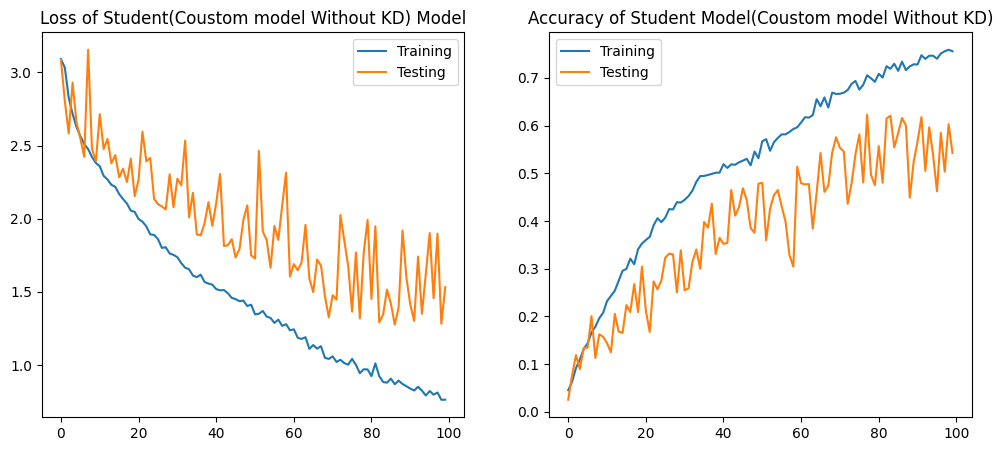

In [ ]:
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(1, 2, 1)
  
# showing image
plt.plot(train_loss,label='Training')
plt.plot(val_los,label='Testing')
plt.legend()
plt.title("Loss of Student(Coustom model Without KD) Model")
fig.add_subplot(1, 2, 2)
  
# showing image
plt.plot(train_acc,label='Training')
plt.plot(val_acc,label='Testing')
plt.legend()
plt.title("Accuracy of Student Model(Coustom model Without KD)")
plt.show()


In [ ]:
classification_report(smodel3,test_loader)

Accuracy of model is : 0.54
                                   precision    recall  f1-score   support

Alstonia Scholaris diseased (P2a)       0.55      0.81      0.66        47
 Alstonia Scholaris healthy (P2b)       0.58      0.47      0.52        32
             Arjun diseased (P1a)       0.83      0.53      0.65        45
              Arjun healthy (P1b)       0.73      0.56      0.63        43
              Bael diseased (P4b)       0.76      0.86      0.81        22
               Basil healthy (P8)       0.43      0.70      0.53        30
           Chinar diseased (P11b)       0.18      0.10      0.12        21
            Chinar healthy (P11a)       0.22      0.11      0.15        18
             Gauva diseased (P3b)       0.38      0.18      0.24        17
              Gauva healthy (P3a)       0.79      0.44      0.56        50
             Jamun diseased (P5b)       0.88      0.24      0.38        62
              Jamun healthy (P5a)       0.55      0.78      0.64       

In [ ]:
train_loss1 = []
val_los1 = []
train_acc1 = []
val_acc1 = []
for i in range(100):
        l1 = []
        l2 = []
        a1 = []
        a2 = []
        start = timer()
        for img,labels in tqdm(sloader2, desc='Training', unit=' unit',leave=False,colour='red'):
            



           # print(end - start)
            
            
            
            img = img.to(device)
            labels = labels.to(device)
            
            output = smodel4(img)
            #print(output.shape)
            probs = F.softmax(output,dim=1)
            max_prob,preds = torch.max(probs,dim=1)
            #print(len(labels))
            acc1 = (torch.sum(preds == labels).item() / len(preds))
            compare = tmodel2(img)
            pdist = F.softmax(compare/4,dim=1)  ##Teacher distribution
            max_prob1,preds1 = torch.max(pdist,dim=1)   #Teacher output
            #accu=[]
            a1.append(acc1)
            #gg = np.mean(accu)
            soft_loss_teacher = nn.KLDivLoss(reduction='batchmean')(F.log_softmax(output /4, dim=1), pdist)
            loss = nn.CrossEntropyLoss()(output,labels)
            loss = 0.2*1*loss + 0.8*1*soft_loss_teacher
            l1.append(loss.item())
            loss.backward()
            optimizers.step()
            optimizers.zero_grad()
            
        for a,b in tqdm(val_loader, desc='Training', unit=' unit',leave=False,colour='red'):
                a = a.to(device)
                b = b.to(device)
                rr = smodel4(a)
                val_loss = nn.CrossEntropyLoss()(rr,b)
                l2.append(val_loss.item())
                probs = F.softmax(rr,dim=1)
                max_prob,preds = torch.max(probs,dim=1)
                acc = (torch.sum(preds == b).item() / len(preds))
                a2.append(acc)
        train_loss1.append(np.mean(l1))
        val_los1.append(np.mean(l2))
        train_acc1.append(np.mean(a1))
        val_acc1.append(np.mean(a2))
        end = timer()
        time = end - start
        time = time/60
        print(f'Epoch {i+1}/100: Train Loss==> {np.mean(l1):.2f} Val Loss==> {np.mean(l2):.2f} Train_Acc==> {np.mean(a1):.2f} Val_Acc==> {np.mean(a2):.2f}')   
        #print(i+1,loss,acc)

Epoch 1/100: Train Loss==> 1.18 Val Loss==> 3.09 Train_Acc==> 0.05 Val_Acc==> 0.04


Epoch 2/100: Train Loss==> 1.17 Val Loss==> 3.09 Train_Acc==> 0.05 Val_Acc==> 0.04


Epoch 3/100: Train Loss==> 1.18 Val Loss==> 3.09 Train_Acc==> 0.05 Val_Acc==> 0.05


Epoch 4/100: Train Loss==> 1.17 Val Loss==> 3.06 Train_Acc==> 0.05 Val_Acc==> 0.05


Epoch 5/100: Train Loss==> 1.15 Val Loss==> 2.76 Train_Acc==> 0.07 Val_Acc==> 0.15


Epoch 6/100: Train Loss==> 1.04 Val Loss==> 2.58 Train_Acc==> 0.11 Val_Acc==> 0.08


Epoch 7/100: Train Loss==> 0.99 Val Loss==> 2.45 Train_Acc==> 0.12 Val_Acc==> 0.17


Epoch 8/100: Train Loss==> 0.98 Val Loss==> 2.82 Train_Acc==> 0.14 Val_Acc==> 0.13


Epoch 9/100: Train Loss==> 0.95 Val Loss==> 2.57 Train_Acc==> 0.18 Val_Acc==> 0.15


Epoch 10/100: Train Loss==> 0.93 Val Loss==> 2.38 Train_Acc==> 0.17 Val_Acc==> 0.18


Epoch 11/100: Train Loss==> 0.90 Val Loss==> 2.27 Train_Acc==> 0.20 Val_Acc==> 0.22


Epoch 12/100: Train Loss==> 0.85 Val Loss==> 2.36 Train_Acc==> 0.26 Val_Acc==> 0.18


Epoch 13/100: Train Loss==> 0.82 Val Loss==> 2.60 Train_Acc==> 0.28 Val_Acc==> 0.19


Epoch 14/100: Train Loss==> 0.83 Val Loss==> 2.11 Train_Acc==> 0.31 Val_Acc==> 0.30


Epoch 15/100: Train Loss==> 0.74 Val Loss==> 2.23 Train_Acc==> 0.36 Val_Acc==> 0.29


Epoch 16/100: Train Loss==> 0.73 Val Loss==> 1.91 Train_Acc==> 0.38 Val_Acc==> 0.35


Epoch 17/100: Train Loss==> 0.68 Val Loss==> 3.44 Train_Acc==> 0.44 Val_Acc==> 0.19


Epoch 18/100: Train Loss==> 0.98 Val Loss==> 2.31 Train_Acc==> 0.21 Val_Acc==> 0.19


Epoch 19/100: Train Loss==> 0.84 Val Loss==> 2.58 Train_Acc==> 0.31 Val_Acc==> 0.21


Epoch 20/100: Train Loss==> 0.80 Val Loss==> 2.18 Train_Acc==> 0.33 Val_Acc==> 0.26


Epoch 21/100: Train Loss==> 0.73 Val Loss==> 1.84 Train_Acc==> 0.39 Val_Acc==> 0.38


Epoch 22/100: Train Loss==> 0.69 Val Loss==> 2.52 Train_Acc==> 0.43 Val_Acc==> 0.23


Epoch 23/100: Train Loss==> 0.66 Val Loss==> 2.11 Train_Acc==> 0.46 Val_Acc==> 0.32


Epoch 24/100: Train Loss==> 0.62 Val Loss==> 2.07 Train_Acc==> 0.50 Val_Acc==> 0.36


Epoch 25/100: Train Loss==> 0.61 Val Loss==> 2.17 Train_Acc==> 0.50 Val_Acc==> 0.32


Epoch 26/100: Train Loss==> 0.56 Val Loss==> 2.03 Train_Acc==> 0.55 Val_Acc==> 0.40


Epoch 27/100: Train Loss==> 0.55 Val Loss==> 2.37 Train_Acc==> 0.58 Val_Acc==> 0.36


Epoch 28/100: Train Loss==> 0.54 Val Loss==> 1.44 Train_Acc==> 0.58 Val_Acc==> 0.53


Epoch 29/100: Train Loss==> 0.50 Val Loss==> 2.41 Train_Acc==> 0.61 Val_Acc==> 0.36


Epoch 30/100: Train Loss==> 0.54 Val Loss==> 2.30 Train_Acc==> 0.58 Val_Acc==> 0.38


Epoch 31/100: Train Loss==> 0.49 Val Loss==> 1.46 Train_Acc==> 0.61 Val_Acc==> 0.54


Epoch 32/100: Train Loss==> 0.47 Val Loss==> 1.50 Train_Acc==> 0.64 Val_Acc==> 0.55


Epoch 33/100: Train Loss==> 0.44 Val Loss==> 3.42 Train_Acc==> 0.67 Val_Acc==> 0.21


Epoch 34/100: Train Loss==> 0.56 Val Loss==> 1.65 Train_Acc==> 0.57 Val_Acc==> 0.49


Epoch 35/100: Train Loss==> 0.46 Val Loss==> 1.45 Train_Acc==> 0.66 Val_Acc==> 0.55


Epoch 36/100: Train Loss==> 0.41 Val Loss==> 1.33 Train_Acc==> 0.69 Val_Acc==> 0.60


Epoch 37/100: Train Loss==> 0.41 Val Loss==> 1.76 Train_Acc==> 0.68 Val_Acc==> 0.49


Epoch 38/100: Train Loss==> 0.43 Val Loss==> 1.42 Train_Acc==> 0.69 Val_Acc==> 0.57


Epoch 39/100: Train Loss==> 0.39 Val Loss==> 1.41 Train_Acc==> 0.72 Val_Acc==> 0.58


Epoch 40/100: Train Loss==> 0.35 Val Loss==> 1.39 Train_Acc==> 0.75 Val_Acc==> 0.59


Epoch 41/100: Train Loss==> 0.35 Val Loss==> 1.73 Train_Acc==> 0.76 Val_Acc==> 0.53


Epoch 42/100: Train Loss==> 0.36 Val Loss==> 1.31 Train_Acc==> 0.75 Val_Acc==> 0.62


Epoch 43/100: Train Loss==> 0.33 Val Loss==> 1.57 Train_Acc==> 0.77 Val_Acc==> 0.58


Epoch 44/100: Train Loss==> 0.36 Val Loss==> 1.65 Train_Acc==> 0.75 Val_Acc==> 0.55


Epoch 45/100: Train Loss==> 0.34 Val Loss==> 1.45 Train_Acc==> 0.76 Val_Acc==> 0.59


Epoch 46/100: Train Loss==> 0.33 Val Loss==> 1.31 Train_Acc==> 0.77 Val_Acc==> 0.64


Epoch 47/100: Train Loss==> 0.34 Val Loss==> 1.60 Train_Acc==> 0.76 Val_Acc==> 0.54


Epoch 48/100: Train Loss==> 0.30 Val Loss==> 1.37 Train_Acc==> 0.79 Val_Acc==> 0.62


Epoch 49/100: Train Loss==> 0.30 Val Loss==> 1.35 Train_Acc==> 0.79 Val_Acc==> 0.61


Epoch 50/100: Train Loss==> 0.27 Val Loss==> 1.28 Train_Acc==> 0.82 Val_Acc==> 0.64


Epoch 51/100: Train Loss==> 0.26 Val Loss==> 1.39 Train_Acc==> 0.83 Val_Acc==> 0.62


Epoch 52/100: Train Loss==> 0.26 Val Loss==> 1.56 Train_Acc==> 0.83 Val_Acc==> 0.55


Epoch 53/100: Train Loss==> 0.28 Val Loss==> 1.41 Train_Acc==> 0.82 Val_Acc==> 0.60


Epoch 54/100: Train Loss==> 0.26 Val Loss==> 2.15 Train_Acc==> 0.85 Val_Acc==> 0.45


Epoch 55/100: Train Loss==> 0.30 Val Loss==> 1.24 Train_Acc==> 0.79 Val_Acc==> 0.63


Epoch 56/100: Train Loss==> 0.25 Val Loss==> 1.15 Train_Acc==> 0.86 Val_Acc==> 0.67


Epoch 57/100: Train Loss==> 0.24 Val Loss==> 1.28 Train_Acc==> 0.87 Val_Acc==> 0.63


Epoch 58/100: Train Loss==> 0.26 Val Loss==> 1.42 Train_Acc==> 0.85 Val_Acc==> 0.61


Epoch 59/100: Train Loss==> 0.24 Val Loss==> 1.49 Train_Acc==> 0.86 Val_Acc==> 0.59


Epoch 60/100: Train Loss==> 0.23 Val Loss==> 1.76 Train_Acc==> 0.87 Val_Acc==> 0.53


Epoch 61/100: Train Loss==> 0.28 Val Loss==> 1.34 Train_Acc==> 0.82 Val_Acc==> 0.58


Epoch 62/100: Train Loss==> 0.23 Val Loss==> 2.47 Train_Acc==> 0.87 Val_Acc==> 0.44


Epoch 63/100: Train Loss==> 0.30 Val Loss==> 1.26 Train_Acc==> 0.81 Val_Acc==> 0.64


Epoch 64/100: Train Loss==> 0.22 Val Loss==> 1.36 Train_Acc==> 0.88 Val_Acc==> 0.62


Epoch 65/100: Train Loss==> 0.22 Val Loss==> 1.29 Train_Acc==> 0.88 Val_Acc==> 0.62


Epoch 66/100: Train Loss==> 0.20 Val Loss==> 1.26 Train_Acc==> 0.91 Val_Acc==> 0.61


Epoch 67/100: Train Loss==> 0.21 Val Loss==> 2.19 Train_Acc==> 0.88 Val_Acc==> 0.44


Epoch 68/100: Train Loss==> 0.30 Val Loss==> 1.25 Train_Acc==> 0.81 Val_Acc==> 0.62


Epoch 69/100: Train Loss==> 0.20 Val Loss==> 1.28 Train_Acc==> 0.92 Val_Acc==> 0.65


Epoch 70/100: Train Loss==> 0.21 Val Loss==> 1.16 Train_Acc==> 0.89 Val_Acc==> 0.67


Epoch 71/100: Train Loss==> 0.19 Val Loss==> 1.51 Train_Acc==> 0.92 Val_Acc==> 0.61


Epoch 72/100: Train Loss==> 0.19 Val Loss==> 1.27 Train_Acc==> 0.92 Val_Acc==> 0.63


Epoch 73/100: Train Loss==> 0.18 Val Loss==> 1.22 Train_Acc==> 0.92 Val_Acc==> 0.64


Epoch 74/100: Train Loss==> 0.20 Val Loss==> 1.18 Train_Acc==> 0.90 Val_Acc==> 0.67


Epoch 75/100: Train Loss==> 0.18 Val Loss==> 1.17 Train_Acc==> 0.93 Val_Acc==> 0.68


Epoch 76/100: Train Loss==> 0.18 Val Loss==> 1.23 Train_Acc==> 0.93 Val_Acc==> 0.66


Epoch 77/100: Train Loss==> 0.18 Val Loss==> 1.27 Train_Acc==> 0.92 Val_Acc==> 0.65


Epoch 78/100: Train Loss==> 0.17 Val Loss==> 1.16 Train_Acc==> 0.94 Val_Acc==> 0.66


Epoch 79/100: Train Loss==> 0.17 Val Loss==> 1.15 Train_Acc==> 0.94 Val_Acc==> 0.65


Epoch 80/100: Train Loss==> 0.21 Val Loss==> 1.49 Train_Acc==> 0.91 Val_Acc==> 0.60


Epoch 81/100: Train Loss==> 0.20 Val Loss==> 1.20 Train_Acc==> 0.91 Val_Acc==> 0.65


Epoch 82/100: Train Loss==> 0.17 Val Loss==> 1.12 Train_Acc==> 0.94 Val_Acc==> 0.66


Epoch 83/100: Train Loss==> 0.17 Val Loss==> 1.30 Train_Acc==> 0.94 Val_Acc==> 0.63


Epoch 84/100: Train Loss==> 0.18 Val Loss==> 1.22 Train_Acc==> 0.93 Val_Acc==> 0.64


Epoch 85/100: Train Loss==> 0.21 Val Loss==> 1.20 Train_Acc==> 0.90 Val_Acc==> 0.64


Epoch 86/100: Train Loss==> 0.16 Val Loss==> 1.29 Train_Acc==> 0.95 Val_Acc==> 0.63


Epoch 87/100: Train Loss==> 0.18 Val Loss==> 1.21 Train_Acc==> 0.93 Val_Acc==> 0.64


Epoch 88/100: Train Loss==> 0.17 Val Loss==> 1.34 Train_Acc==> 0.95 Val_Acc==> 0.62


Epoch 89/100: Train Loss==> 0.18 Val Loss==> 1.23 Train_Acc==> 0.94 Val_Acc==> 0.67


Epoch 90/100: Train Loss==> 0.16 Val Loss==> 1.17 Train_Acc==> 0.95 Val_Acc==> 0.68


Epoch 91/100: Train Loss==> 0.16 Val Loss==> 1.12 Train_Acc==> 0.95 Val_Acc==> 0.68


Epoch 92/100: Train Loss==> 0.15 Val Loss==> 1.15 Train_Acc==> 0.96 Val_Acc==> 0.66


Epoch 93/100: Train Loss==> 0.16 Val Loss==> 1.14 Train_Acc==> 0.95 Val_Acc==> 0.66


Epoch 94/100: Train Loss==> 0.16 Val Loss==> 1.18 Train_Acc==> 0.96 Val_Acc==> 0.66


Epoch 95/100: Train Loss==> 0.15 Val Loss==> 1.13 Train_Acc==> 0.97 Val_Acc==> 0.66


Epoch 96/100: Train Loss==> 0.15 Val Loss==> 1.16 Train_Acc==> 0.96 Val_Acc==> 0.66


Epoch 97/100: Train Loss==> 0.15 Val Loss==> 1.32 Train_Acc==> 0.96 Val_Acc==> 0.61


Epoch 98/100: Train Loss==> 0.16 Val Loss==> 1.13 Train_Acc==> 0.96 Val_Acc==> 0.67


Epoch 99/100: Train Loss==> 0.15 Val Loss==> 1.09 Train_Acc==> 0.97 Val_Acc==> 0.66


Epoch 100/100: Train Loss==> 0.16 Val Loss==> 1.23 Train_Acc==> 0.94 Val_Acc==> 0.64


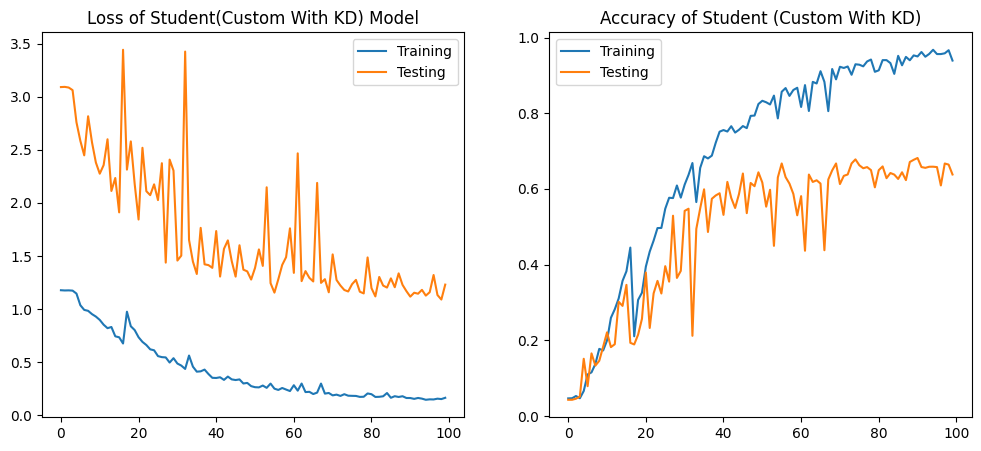

In [ ]:
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(1, 2, 1)
  
# showing image
plt.plot(train_loss1,label='Training')
plt.plot(val_los1,label='Testing')
plt.legend()
plt.title("Loss of Student(Custom With KD) Model")
fig.add_subplot(1, 2, 2)
  
# showing image
plt.plot(train_acc1,label='Training')
plt.plot(val_acc1,label='Testing')
plt.legend()
plt.title("Accuracy of Student (Custom With KD)")
plt.show()


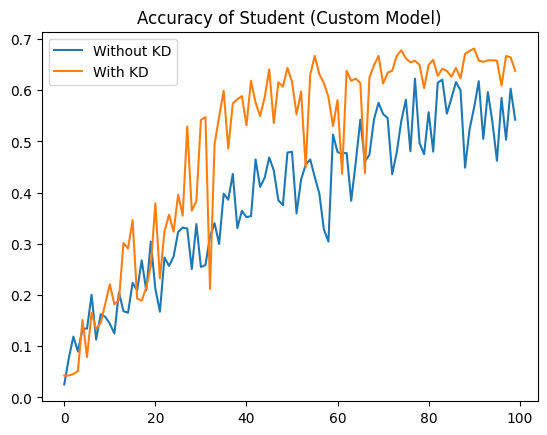

In [ ]:
plt.plot(val_acc,label='Without KD')
plt.plot(val_acc1,label='With KD')
plt.legend()
plt.title("Accuracy of Student (Custom Model)")
plt.show()


In [ ]:
joblib.dump(smodel4, 'csmodel_rnet.pkl')

['csmodel_rnet.pkl']

# Ensemble

In [ ]:
import joblib
smodel1 = joblib.load('shufflemodel_dnet.pkl').cuda()
ssmodel2 = joblib.load('csmodel_dnet.pkl').cuda()
smodel3 = joblib.load('shufflemodel_rnet.pkl').cuda()
ssmodel4 = joblib.load('csmodel_rnet.pkl').cuda()

In [ ]:
start = timer()
predictions1 = []
predictions2 = []
predictions3 = []
predictions4 = []
max1 = []
max2 = []
max3 = []
max4 = []
accu = []
l_act = []
i = 0
for images_test,labels_test in test_loader:
    #i = i+1```````````````````````````````
    images_test = images_test.to(device)
    labels_test = labels_test.to(device)
    ypred = ssmodel2(images_test)
    probs = F.softmax(ypred,dim=1)
    max_prob,preds = torch.max(probs,dim=1)
    max1.append(max_prob)
    predictions2.append(preds)
    
    
    ypred = smodel1(images_test)
    probs = F.softmax(ypred,dim=1)
    max_prob,preds = torch.max(probs,dim=1)
    max2.append(max_prob)
    predictions1.append(preds)
    
    
    ypred = smodel3(images_test)
    probs = F.softmax(ypred,dim=1)
    max_prob,preds = torch.max(probs,dim=1)
    max3.append(max_prob)
    predictions3.append(preds)
    
    ypred = ssmodel4(images_test)
    probs = F.softmax(ypred,dim=1)
    max_prob,preds = torch.max(probs,dim=1)
    max4.append(max_prob)
    predictions4.append(preds)
    #print(preds)
    #print(max_prob)
    #acc = (torch.sum(preds == labels_test).item() / len(preds))
    #accu.append(acc)
    #predictions.append(preds)
    l_act.append(labels_test)
    print(labels_test)


In [ ]:
p1 = []
for i in predictions1:
    for j in i:
        p1.append(j.item())
p2 = []
for i in predictions2:
    for j in i:
        p2.append(j.item())
p3 = []
for i in predictions3:
    for j in i:
        p3.append(j.item())
p4 = []
for i in predictions4:
    for j in i:
        p4.append(j.item())
    

In [ ]:
ytrue = []
for i in l_act:
    for j in i:
        ytrue.append(j.item())

In [ ]:
m1 = []
m2 = []
m3 = []
m4 = []
for i in max1:
    for j in i:
        m1.append(j.item())
for i in max2:
    for j in i:
        m2.append(j.item())
for i in max3:
    for j in i:
        m3.append(j.item())
for i in max4:
    for j in i:
        m4.append(j.item())
    
#predictions[0]

In [ ]:
from collections import Counter
def most_frequent(List):
    return max(set(List), key = List.count)

In [ ]:
def ensemble(p1,p2,p3,p4):
    final_pred = []
    for i in range(len(p1)):
        compare = []
        prob = []
        compare.append(p1[i])
        compare.append(p2[i])
        compare.append(p3[i])
        compare.append(p4[i])
        prob.append(m1[i])
        prob.append(m2[i])
        prob.append(m3[i])
        prob.append(m4[i])
       # print(prob)
        a = most_frequent(compare) 
        d = Counter(compare)
        count = d[a]
        if(count==1):
            maximum = np.argmax(prob,0)
            final_pred.append(compare[maximum])
        else:
            final_pred.append(a)
    return final_pred

In [ ]:
final = ensemble(p1,p2,p3,p4)

In [ ]:
report = pd.DataFrame()
report['Actual'] = ytrue
report['Predicted'] = final
report_ensemble = report.copy()
from sklearn.metrics import classification_report
print(classification_report(report['Actual'], report['Predicted']))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67        47
           1       0.58      0.56      0.57        32
           2       0.87      0.60      0.71        45
           3       0.81      0.88      0.84        43
           4       0.88      0.95      0.91        22
           5       0.68      0.93      0.79        30
           6       0.60      0.57      0.59        21
           7       0.29      0.56      0.38        18
           8       0.61      0.65      0.63        17
           9       0.79      0.74      0.76        50
          10       0.70      0.52      0.59        62
          11       0.60      0.54      0.57        59
          12       0.53      0.47      0.50        19
          13       0.19      0.17      0.18        18
          14       0.45      0.45      0.45        11
          15       0.75      0.75      0.75        32
          16       0.87      0.91      0.89        44
          17       0.83    